# Quantium Data Analytics Virtual Internship

**Step 1: Importing Libraries**

In [276]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

**Step 2: Loading and Initial Exploration**

In [2]:
df_pb = pd.read_csv(r"G:\OWN PROJECTS\Forage\Quantium\QVI_purchase_behaviour.csv")
df_trans = pd.read_excel(r"G:\OWN PROJECTS\Forage\Quantium\QVI_transaction_data.xlsx")

In [3]:
df_pb

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [4]:
df_pb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
df_trans

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [6]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


**Changing date format**

In [7]:
df_trans['DATE'] = pd.to_datetime(df_trans['DATE'], unit='D', origin='1899-12-30')
df_trans

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [8]:
df_trans.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [9]:
df_trans.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [10]:
df_trans.shape

(264836, 8)

In [11]:
df_notchips = df_trans[~df_trans['PROD_NAME'].str.contains('chip', case=False)]

In [12]:
df_notchips.PROD_NAME.unique()

array(['CCs Nacho Cheese    175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Grain Waves         Sweet Chilli 210g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'CCs Original 175g', 'Burger Rings 220g',
       'NCC Sour Cream &    Garden Chives 175g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g', 'Kettle Original 175g',
       'Red Rock Deli Thai  Chilli&Lime 150g',
       'Pringles Sthrn FriedChicken 134g', 'Pringles Sweet&Spcy BBQ 134g',
       'Red Rock Deli SR    Salsa & Mzzrlla 150g',
       'Red Rock Deli Sp    Salt & Truffle 150G',
       'Smiths Thinly       Swt Chli&S/Cream175G', 'Kettle Chilli 175g',
       'Doritos Mexicana    170g',
       'Smiths Crinkle Cut 

**removing salsa**

In [13]:
df_trans = df_trans[~df_trans['PROD_NAME'].str.contains('salsa', case=False)]

In [14]:
df_trans.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'Kettle Original 175g',
       'Red Rock Deli Thai  C

In [15]:
df_trans

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [16]:
df_trans.shape

(246742, 8)

In [17]:
df_trans.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


**finding outlier**

In [18]:
df_trans.sort_values(by='PROD_QTY').tail(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
216985,2019-05-15,58,58389,54545,42,Doritos Corn Chip Mexican Jalapeno 150g,5,19.50
216994,2018-08-18,63,63033,59554,99,Pringles Sthrn FriedChicken 134g,5,18.50
99796,2018-08-19,250,250278,252612,102,Kettle Mozzarella Basil & Pesto 175g,5,27.00
185042,2018-08-20,71,71013,68967,90,Tostitos Smoked Chipotle 175g,5,22.00
99764,2018-08-18,237,237317,241546,20,Doritos Cheese Supreme 330g,5,28.50
99754,2018-08-17,235,235164,238117,4,Dorito Corn Chp Supreme 380g,5,16.25
32100,2019-05-17,25,25013,21661,26,Pringles Sweet&Spcy BBQ 134g,5,18.50
151035,2019-05-17,230,230101,232597,44,Thins Chips Light& Tangy 175g,5,16.50
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.00
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.00


In [19]:
df_trans[df_trans['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [20]:
df_trans[df_trans['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


**dropped outlier**

In [21]:
df_trans = df_trans[df_trans['PROD_QTY'] != 200]

In [22]:
df_trans.sort_values(by='PROD_QTY').tail(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
5109,2018-08-18,57,57122,51950,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,5,23.0
5031,2019-05-20,12,12000,10510,62,Pringles Mystery Flavour 134g,5,18.5
55531,2018-08-18,180,180094,181582,42,Doritos Corn Chip Mexican Jalapeno 150g,5,19.5
5055,2019-05-18,24,24060,20619,61,Smiths Crinkle Cut Chips Chicken 170g,5,14.5
32142,2018-08-17,39,39183,35744,81,Pringles Original Crisps 134g,5,18.5
185147,2019-05-19,104,104027,103879,81,Pringles Original Crisps 134g,5,18.5
5064,2019-05-16,26,26185,23086,93,Doritos Corn Chip Southern Chicken 150g,5,19.5
32163,2018-08-15,43,43213,40082,56,Cheezels Cheese Box 125g,5,10.5
185141,2019-05-15,102,102148,102430,38,Infuzions Mango Chutny Papadums 70g,5,12.0
5107,2018-08-17,54,54225,48172,46,Kettle Original 175g,5,27.0


In [23]:
df_trans.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


In [24]:
df_trans.DATE.count()

246740

In [25]:
df_trans.groupby("DATE").size().reset_index(name='Transaction Count')

,DATE,Transaction Count
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


**Let’s create a sequence of
dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to
find the missing date**


In [26]:
#Generating date range
date_range = pd.date_range(start = '2018-07-01', end='2019-06-30')

#Counting Transactions by date
transactions_by_day = df_trans['DATE'].value_counts().sort_index()

#finding missing dates 
missing_dates = date_range[~date_range.isin(transactions_by_day.index)]

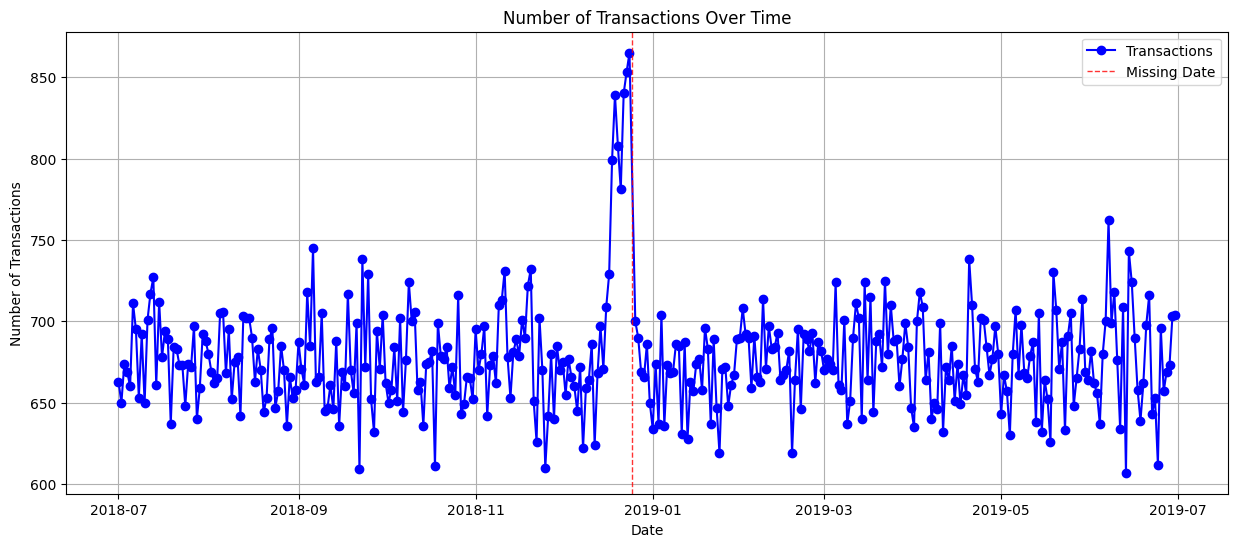

Missing Dates: DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')


In [27]:
plt.figure(figsize=(15, 6))
plt.plot(transactions_by_day.index, transactions_by_day.values, marker='o', linestyle='-', color='b', label='Transactions')
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)

# Highlight missing dates
for missing_date in missing_dates:
    plt.axvline(missing_date, color='r', linestyle='--', linewidth=1, alpha=0.8, label='Missing Date')

plt.legend()
plt.show()

print(f"Missing Dates: {missing_dates}")

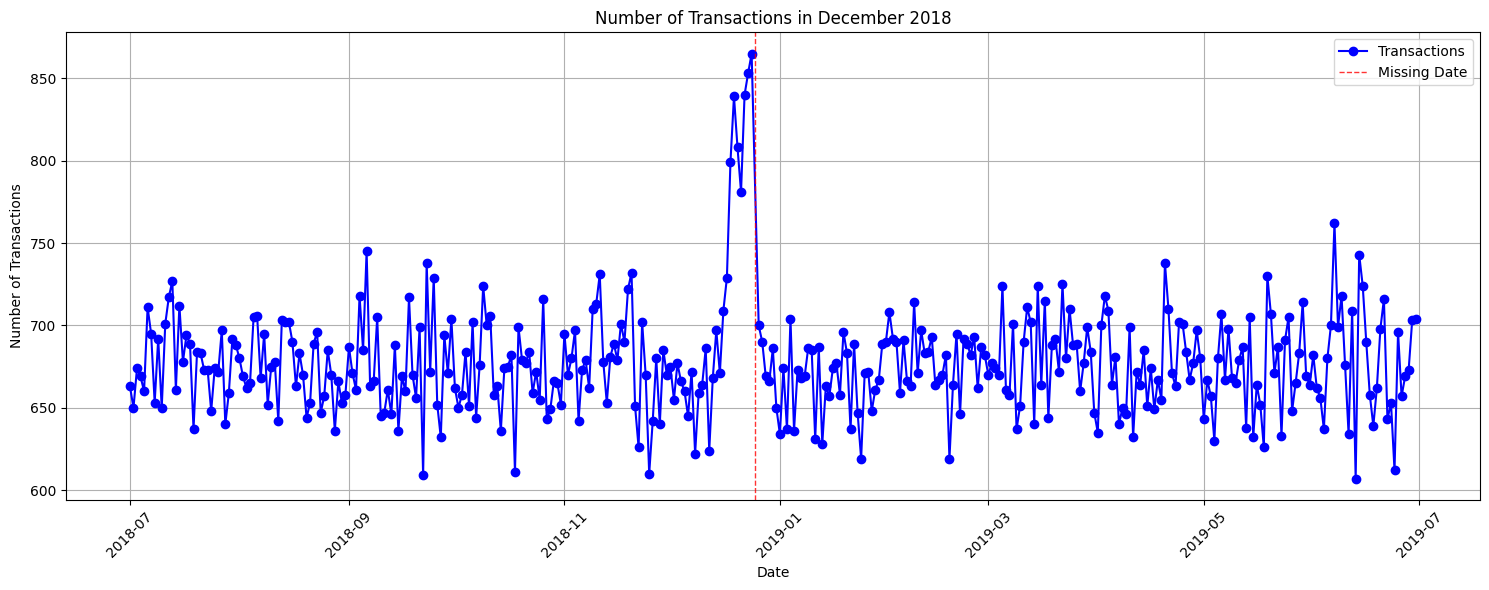

Missing Dates in December 2018: DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')


In [28]:
# Step 1: Generate the Date Range
date_range_2 = pd.date_range(start='2018-12-01', end='2018-12-31')



# Step 4: Create a Chart
plt.figure(figsize=(15, 6))
plt.plot(df_trans['DATE'].value_counts().sort_index().index, df_trans['DATE'].value_counts().sort_index().values, marker='o', linestyle='-', color='b', label='Transactions')
plt.title('Number of Transactions in December 2018')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Highlight missing dates
for missing_date in  date_range_2[~date_range_2.isin(df_trans['DATE'].value_counts().sort_index().index)]:
    plt.axvline(missing_date, color='r', linestyle='--', linewidth=1, alpha=0.8, label='Missing Date')

plt.legend()
plt.show()

print(f"Missing Dates in December 2018: {missing_dates}")

C:\Users\arvin\AppData\Local\Temp\ipykernel_10084\191442001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans['DATE'] = pd.to_datetime(df_trans['DATE'])


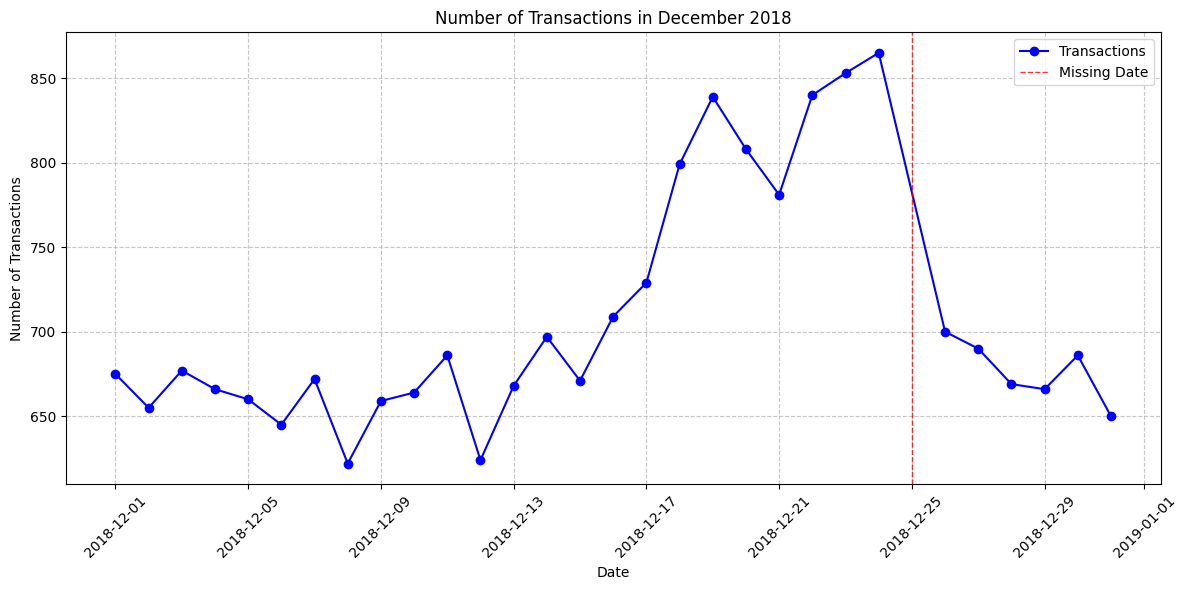

Missing Dates in December 2018: DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')


In [29]:
df_trans['DATE'] = pd.to_datetime(df_trans['DATE'])

# Filter Data for December 2018
df_december = df_trans[(df_trans['DATE'] >= '2018-12-01') & (df_trans['DATE'] <= '2018-12-31')]

# Count Transactions by Date
transactions_by_date = df_december.groupby('DATE').size()

# Generate Date Range for December 2018
date_range_december = pd.date_range(start='2018-12-01', end='2018-12-31')

# Identify Missing Dates in December
missing_dates = date_range_december[~date_range_december.isin(transactions_by_date.index)]

# Create a Line Chart for December 2018
plt.figure(figsize=(12, 6))
plt.plot(transactions_by_date.index, transactions_by_date.values, marker='o', linestyle='-', color='b', label='Transactions')
plt.title('Number of Transactions in December 2018')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Highlight missing dates
for missing_date in missing_dates:
    plt.axvline(missing_date, color='r', linestyle='--', linewidth=1, alpha=0.8, label='Missing Date')

plt.legend()
plt.show()

print(f"Missing Dates in December 2018: {missing_dates}")

**we can see there's no sale on Christmas and this is because shops are close**

In [30]:
df_trans

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


**creating column PACK_SIZE**

In [31]:
df_trans["PACK_SIZE"]= df_trans["PROD_NAME"].str.extract(r'(\d+)(g|G)')[0].astype(float)

C:\Users\arvin\AppData\Local\Temp\ipykernel_10084\2004743839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans["PACK_SIZE"]= df_trans["PROD_NAME"].str.extract(r'(\d+)(g|G)')[0].astype(float)


In [32]:
df_trans.PACK_SIZE.sort_values()

40783      70.0
42461      70.0
176183     70.0
227309     70.0
42418      70.0
          ...  
192034    380.0
255797    380.0
233814    380.0
131573    380.0
102409    380.0
Name: PACK_SIZE, Length: 246740, dtype: float64

array([[<Axes: title={'center': 'PACK_SIZE'}>]], dtype=object)

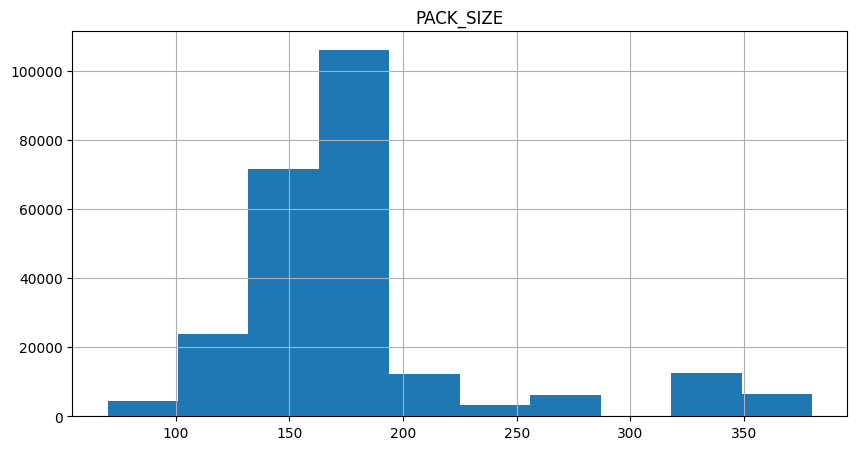

In [33]:
df_trans.hist(column="PACK_SIZE",figsize = (10,5))

In [34]:
df_trans["PROD_NAME"]= df_trans.PROD_NAME.str.upper()
df_trans.PROD_NAME

C:\Users\arvin\AppData\Local\Temp\ipykernel_10084\1437415245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans["PROD_NAME"]= df_trans.PROD_NAME.str.upper()


0           NATURAL CHIP        COMPNY SEASALT175G
1                         CCS NACHO CHEESE    175G
2           SMITHS CRINKLE CUT  CHIPS CHICKEN 170G
3           SMITHS CHIP THINLY  S/CREAM&ONION 175G
4         KETTLE TORTILLA CHPSHNY&JLPNO CHILI 150G
                            ...                   
264831     KETTLE SWEET CHILLI AND SOUR CREAM 175G
264832               TOSTITOS SPLASH OF  LIME 175G
264833                    DORITOS MEXICANA    170G
264834     DORITOS CORN CHIP MEXICAN JALAPENO 150G
264835               TOSTITOS SPLASH OF  LIME 175G
Name: PROD_NAME, Length: 246740, dtype: object

In [35]:
df_trans["BRAND"] =df_trans["PROD_NAME"].str.split().str[0]

C:\Users\arvin\AppData\Local\Temp\ipykernel_10084\3102706594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans["BRAND"] =df_trans["PROD_NAME"].str.split().str[0]


**counting number of chips per brand**

In [36]:
df_trans.BRAND.value_counts()

BRAND
KETTLE        41288
SMITHS        27390
PRINGLES      25102
DORITOS       22041
THINS         14075
RRD           11894
INFUZIONS     11057
WW            10320
COBS           9693
TOSTITOS       9471
TWISTIES       9454
TYRRELLS       6442
GRAIN          6272
NATURAL        6050
CHEEZELS       4603
CCS            4551
RED            4427
DORITO         3183
INFZNS         3144
SMITH          2963
CHEETOS        2927
SNBTS          1576
BURGER         1564
WOOLWORTHS     1516
GRNWVES        1468
SUNBITES       1432
NCC            1419
FRENCH         1418
Name: count, dtype: int64

**Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red
Rock Deli chips. Let’s combine these together**

In [37]:
brand_mapping= {
    'SMITH': 'SMITHS',
    'DORITO' : 'DORITOS',
    'RED': 'RRD',
    'INFZNS': 'INFUZIONS',
    'WW':'WOOLWORTHS',
    'GRNWVES': 'GRAIN',
    'NCC': 'NATURAL',
    'SNBTS':'SUNBITES'
}

df_trans['BRAND'] = df_trans['BRAND'].replace(brand_mapping)

C:\Users\arvin\AppData\Local\Temp\ipykernel_10084\430616264.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans['BRAND'] = df_trans['BRAND'].replace(brand_mapping)


In [38]:
df_trans.BRAND.unique().tolist()

['NATURAL',
 'CCS',
 'SMITHS',
 'KETTLE',
 'GRAIN',
 'DORITOS',
 'TWISTIES',
 'WOOLWORTHS',
 'THINS',
 'BURGER',
 'CHEEZELS',
 'INFUZIONS',
 'RRD',
 'PRINGLES',
 'TYRRELLS',
 'COBS',
 'FRENCH',
 'TOSTITOS',
 'CHEETOS',
 'SUNBITES']

**analyzing customer data**

In [39]:
df_pb

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [40]:
df_pb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


**exploring customer data**

In [41]:
df_pb.LIFESTAGE.value_counts()

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

In [42]:
df_pb.PREMIUM_CUSTOMER.value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

**Merging data frames**

In [43]:
new_df = df_trans.merge(df_pb,how='right',on='LYLTY_CARD_NBR')
new_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1.0,1000,1.0,5.0,NATURAL CHIP COMPNY SEASALT175G,2.0,6.0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,2018-09-16,1.0,1002,2.0,58.0,RED ROCK DELI CHIKN&GARLIC AIOLI 150G,1.0,2.7,150.0,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,2019-03-07,1.0,1003,3.0,52.0,GRAIN WAVES SOUR CREAM&CHIVES 210G,1.0,3.6,210.0,GRAIN,YOUNG FAMILIES,Budget
3,2019-03-08,1.0,1003,4.0,106.0,NATURAL CHIPCO HONY SOY CHCKN175G,1.0,3.0,175.0,NATURAL,YOUNG FAMILIES,Budget
4,2018-11-02,1.0,1004,5.0,96.0,WW ORIGINAL STACKED CHIPS 160G,1.0,1.9,160.0,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
248085,2018-08-03,88.0,2370651,240350.0,4.0,DORITO CORN CHP SUPREME 380G,2.0,13.0,380.0,DORITOS,MIDAGE SINGLES/COUPLES,Mainstream
248086,2018-12-08,88.0,2370701,240378.0,24.0,GRAIN WAVES SWEET CHILLI 210G,2.0,7.2,210.0,GRAIN,YOUNG FAMILIES,Mainstream
248087,2018-10-01,88.0,2370751,240394.0,60.0,KETTLE TORTILLA CHPSFETA&GARLIC 150G,2.0,9.2,150.0,KETTLE,YOUNG FAMILIES,Premium
248088,2018-10-24,88.0,2370961,240480.0,70.0,TYRRELLS CRISPS LIGHTLY SALTED 165G,2.0,8.4,165.0,TYRRELLS,OLDER FAMILIES,Budget


In [44]:
new_df.to_csv(r"C:\Users\arvin\OneDrive\OWN PROJECTS\Forage\Quantium\quantium_data_analysis.csv")

**data exploration complete**

**DATA ANALYSIS ON CUSTOMER SEGMENT**

**total sales by lifestyle and premium customer**

In [45]:
total_sales = new_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
total_sales

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,33345.70
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25
2,MIDAGE SINGLES/COUPLES,Premium,54443.85
3,NEW FAMILIES,Budget,20607.45
4,NEW FAMILIES,Mainstream,15979.70
5,NEW FAMILIES,Premium,10760.80
6,OLDER FAMILIES,Budget,156863.75
7,OLDER FAMILIES,Mainstream,96413.55
8,OLDER FAMILIES,Premium,75242.60
9,OLDER SINGLES/COUPLES,Budget,127833.60


In [46]:
heatmap_data = total_sales.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='TOT_SALES')
heatmap_data

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,33345.70,84734.25,54443.85
NEW FAMILIES,20607.45,15979.70,10760.80
OLDER FAMILIES,156863.75,96413.55,75242.60
OLDER SINGLES/COUPLES,127833.60,124648.50,123537.55
RETIREES,105916.30,145168.95,91296.65
YOUNG FAMILIES,129717.95,86338.25,78571.70
YOUNG SINGLES/COUPLES,57122.10,147582.20,39052.30


In [47]:
totals =heatmap_data.sum(axis=1)
heatmap_data_percent = heatmap_data.div(totals,axis=0)*100

**heatmap to show purchasing behaviour**

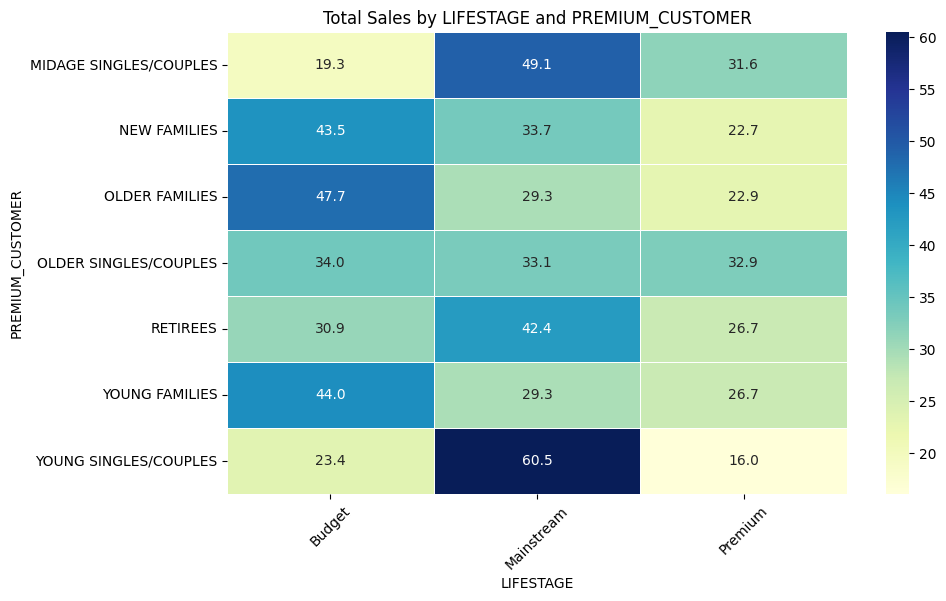

In [48]:
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_percent, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Total Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.ylabel('PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.xticks(rotation=45)
plt.show()

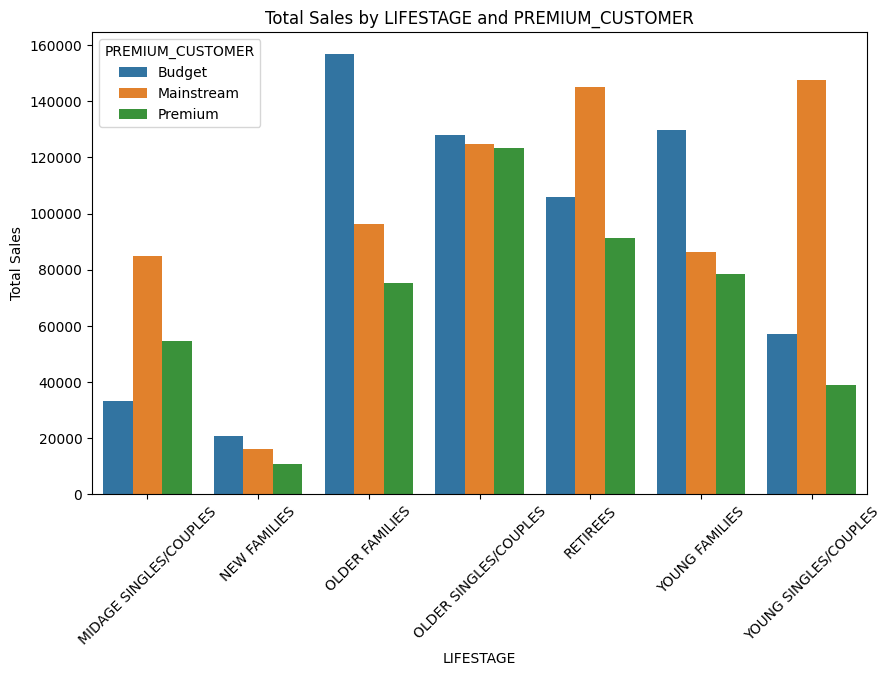

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=total_sales)
plt.title('Total Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='PREMIUM_CUSTOMER')

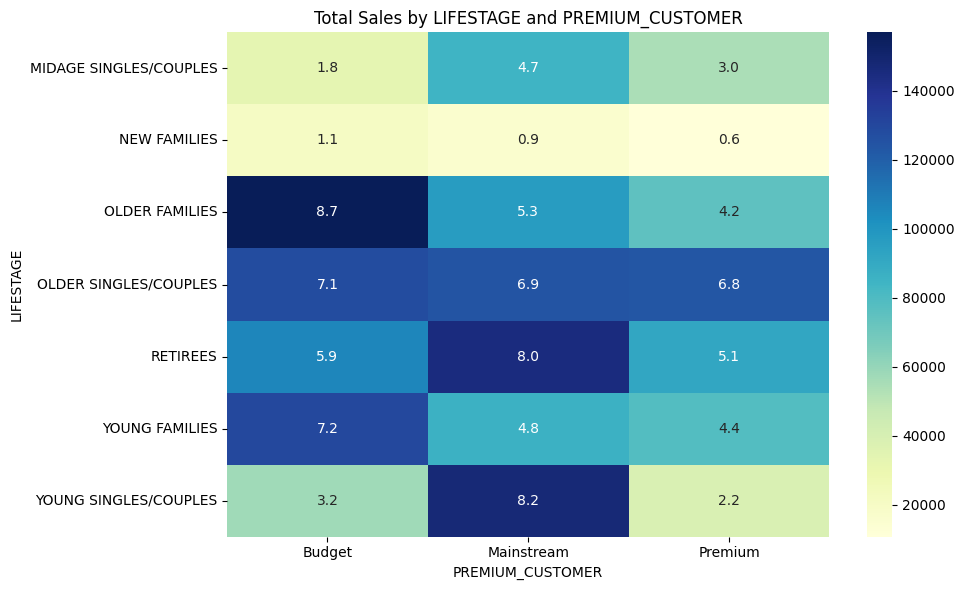

In [50]:
heatmap_data = total_sales.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='TOT_SALES')

# Calculate percentages for annotations
total_sales = heatmap_data.sum().sum()
percentages = heatmap_data / total_sales * 100

# Plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=percentages, fmt='.1f', cmap='YlGnBu', cbar=True)
plt.title('Total Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('PREMIUM_CUSTOMER')
plt.ylabel('LIFESTAGE')

plt.tight_layout()
plt.show()

**sales are coming from BUDGET-OLDER FAMILIES, MAINSTREAM-YOUNG SINGLES/COUPLES and RETIREES**

In [51]:
customer_count = new_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).size().reset_index(name='count')

In [52]:
heatmap_data_cust = customer_count.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='count')
total_count = heatmap_data_cust.sum().sum()
percentages = heatmap_data_cust / total_count * 100

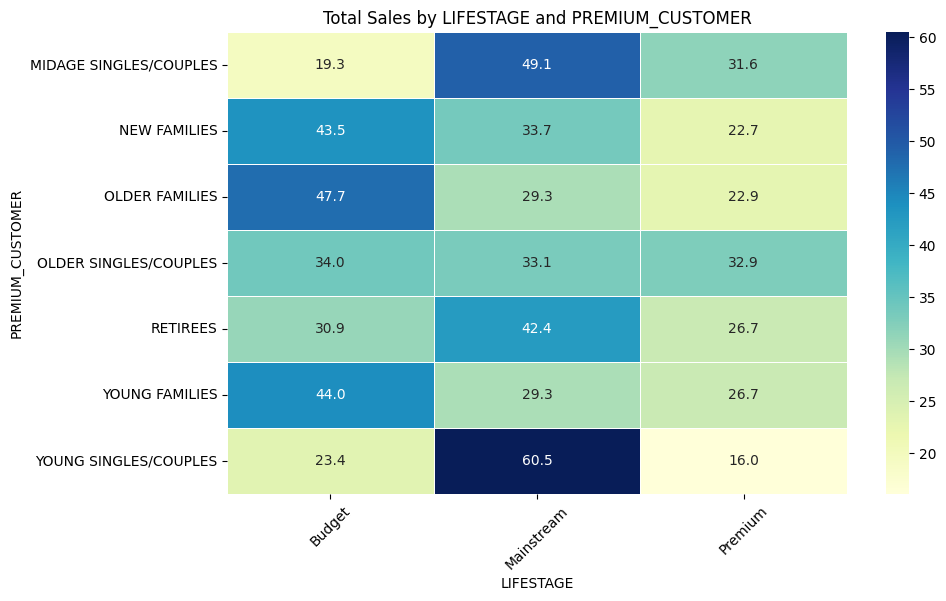

In [53]:
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_percent, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Total Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.ylabel('PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.xticks(rotation=45)
plt.show()

**There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget Older families segment.**

In [54]:
new_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1.0,1000,1.0,5.0,NATURAL CHIP COMPNY SEASALT175G,2.0,6.0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,2018-09-16,1.0,1002,2.0,58.0,RED ROCK DELI CHIKN&GARLIC AIOLI 150G,1.0,2.7,150.0,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,2019-03-07,1.0,1003,3.0,52.0,GRAIN WAVES SOUR CREAM&CHIVES 210G,1.0,3.6,210.0,GRAIN,YOUNG FAMILIES,Budget
3,2019-03-08,1.0,1003,4.0,106.0,NATURAL CHIPCO HONY SOY CHCKN175G,1.0,3.0,175.0,NATURAL,YOUNG FAMILIES,Budget
4,2018-11-02,1.0,1004,5.0,96.0,WW ORIGINAL STACKED CHIPS 160G,1.0,1.9,160.0,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
248085,2018-08-03,88.0,2370651,240350.0,4.0,DORITO CORN CHP SUPREME 380G,2.0,13.0,380.0,DORITOS,MIDAGE SINGLES/COUPLES,Mainstream
248086,2018-12-08,88.0,2370701,240378.0,24.0,GRAIN WAVES SWEET CHILLI 210G,2.0,7.2,210.0,GRAIN,YOUNG FAMILIES,Mainstream
248087,2018-10-01,88.0,2370751,240394.0,60.0,KETTLE TORTILLA CHPSFETA&GARLIC 150G,2.0,9.2,150.0,KETTLE,YOUNG FAMILIES,Premium
248088,2018-10-24,88.0,2370961,240480.0,70.0,TYRRELLS CRISPS LIGHTLY SALTED 165G,2.0,8.4,165.0,TYRRELLS,OLDER FAMILIES,Budget


In [55]:
#Average number of units bought per customer by LIFESTAGE and PREMIUM_CUSTOMER

average_sale = new_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index(name='average')

average_sale

,LIFESTAGE,PREMIUM_CUSTOMER,average
0,MIDAGE SINGLES/COUPLES,Budget,1.893626
1,MIDAGE SINGLES/COUPLES,Mainstream,1.911942
2,MIDAGE SINGLES/COUPLES,Premium,1.891750
3,NEW FAMILIES,Budget,1.855878
4,NEW FAMILIES,Mainstream,1.858124
5,NEW FAMILIES,Premium,1.860887
6,OLDER FAMILIES,Budget,1.945384
7,OLDER FAMILIES,Mainstream,1.948795
8,OLDER FAMILIES,Premium,1.945496
9,OLDER SINGLES/COUPLES,Budget,1.914920


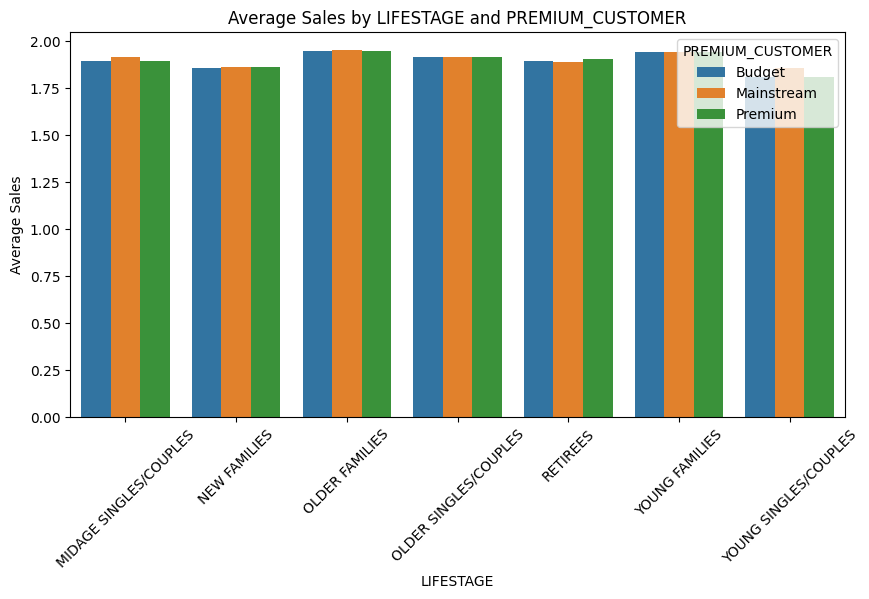

In [56]:
#plotting on chart
plt.figure(figsize=(10,5 ))
sns.barplot(x='LIFESTAGE', y='average', hue='PREMIUM_CUSTOMER', data=average_sale)
plt.title('Average Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.legend(title='PREMIUM_CUSTOMER')

**Older families and young families in general buy more chips per customer**

In [57]:
# Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER

new_df['average_per_unit'] = new_df['TOT_SALES']/new_df['PROD_QTY']

In [58]:
average_unit=new_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['average_per_unit'].mean().reset_index(name='average')

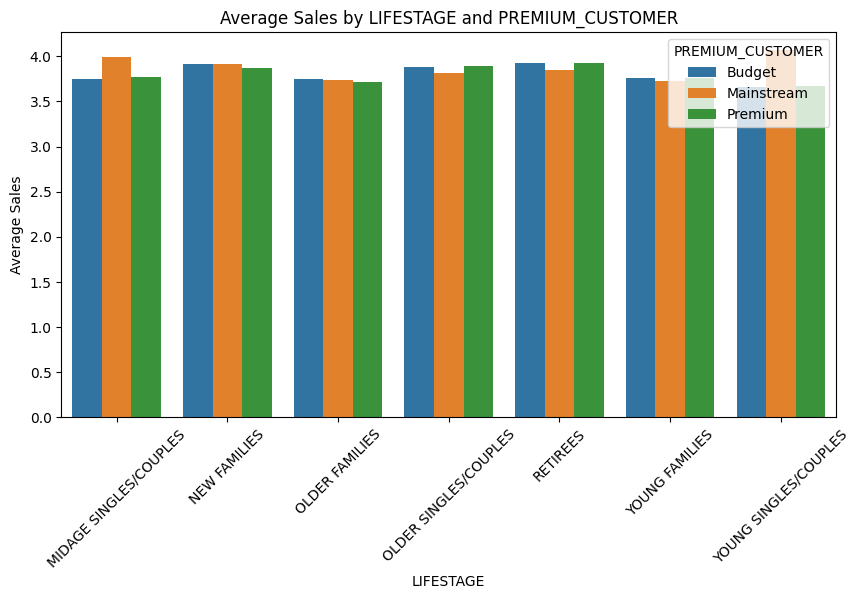

In [59]:
#plotting on chart
plt.figure(figsize=(10,5 ))
sns.barplot(x='LIFESTAGE', y='average', hue='PREMIUM_CUSTOMER', data=average_unit)
plt.title('Average Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.legend(title='PREMIUM_CUSTOMER')

**Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to
buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own
consumption. This is also supported by there being fewer premium midage and young singles and couples
buying chips compared to their mainstream counterparts**

In [60]:
# Deep dive into Mainstream, young singles/couples segment
segment1 = new_df[(new_df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (new_df['PREMIUM_CUSTOMER'] == "Mainstream")]

# Other segments
other = new_df[~((new_df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (new_df['PREMIUM_CUSTOMER'] == "Mainstream"))]

# Print segment1 and other to verify
print("Segment 1 (Mainstream, young singles/couples):")
print(segment1.head())

print("\nOther segments:")
print(other.head())


Segment 1 (Mainstream, young singles/couples):
         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
1  2018-09-16        1.0            1002     2.0      58.0   
9  2018-09-09        1.0            1010    10.0      51.0   
19 2018-09-03        1.0            1018    22.0       3.0   
20 2018-11-28        1.0            1018    23.0      97.0   
21 2019-06-20        1.0            1018    24.0      38.0   

                                   PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
1      RED ROCK DELI CHIKN&GARLIC AIOLI 150G       1.0        2.7      150.0   
9                   DORITOS MEXICANA    170G       2.0        8.8      170.0   
19  KETTLE SENSATIONS   CAMEMBERT & FIG 150G       1.0        4.6      150.0   
20                  RRD SALT & VINEGAR  165G       1.0        3.0      165.0   
21   INFUZIONS MANGO     CHUTNY PAPADUMS 70G       1.0        2.4       70.0   

        BRAND              LIFESTAGE PREMIUM_CUSTOMER  average_per_unit  
1         RRD  YOUNG SING

In [61]:
# Calculate total quantity for segment1 and other
quantity_segment1=segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

In [62]:
# Calculate quantity by brand for segment1
quantity_segment1_by_brand = segment1.groupby('BRAND')['PROD_QTY'].sum().reset_index(name='targetsegment')
quantity_segment1_by_brand

,BRAND,targetsegment
0,BURGER,106.0
1,CCS,405.0
2,CHEETOS,291.0
3,CHEEZELS,651.0
4,COBS,1617.0
5,DORITOS,4447.0
6,FRENCH,143.0
7,GRAIN,1185.0
8,INFUZIONS,2343.0
9,KETTLE,7172.0


In [63]:
quantity_segment1_by_brand['targetSegment'] = quantity_segment1_by_brand['targetsegment'] / quantity_segment1
quantity_segment1_by_brand

,BRAND,targetsegment,targetSegment
0,BURGER,106.0,0.002926
1,CCS,405.0,0.011180
2,CHEETOS,291.0,0.008033
3,CHEEZELS,651.0,0.017971
4,COBS,1617.0,0.044638
5,DORITOS,4447.0,0.122761
6,FRENCH,143.0,0.003948
7,GRAIN,1185.0,0.032712
8,INFUZIONS,2343.0,0.064679
9,KETTLE,7172.0,0.197985


In [64]:
quantity_other_by_brand = other.groupby('BRAND').agg(other=('PROD_QTY', 'sum')).reset_index()
quantity_other_by_brand['other'] = quantity_other_by_brand['other'] / quantity_other

In [65]:
brand_proportions = pd.merge(quantity_segment1_by_brand, quantity_other_by_brand, on='BRAND')

In [66]:
brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['other']
brand_proportions

,BRAND,targetsegment,targetSegment,other,affinityToBrand
0,BURGER,106.0,0.002926,0.006596,0.443597
1,CCS,405.0,0.011180,0.018896,0.591677
2,CHEETOS,291.0,0.008033,0.012067,0.665733
3,CHEEZELS,651.0,0.017971,0.018647,0.963753
4,COBS,1617.0,0.044638,0.039049,1.143124
5,DORITOS,4447.0,0.122761,0.101075,1.214553
6,FRENCH,143.0,0.003948,0.005758,0.685569
7,GRAIN,1185.0,0.032712,0.031188,1.048873
8,INFUZIONS,2343.0,0.064679,0.057065,1.133435
9,KETTLE,7172.0,0.197985,0.165553,1.195897


In [67]:
import pandas as pd

# Calculate targetSegment by PACK_SIZE
quantity_segment1_by_pack = segment1.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
quantity_segment1 = quantity_segment1_by_pack['PROD_QTY'].sum()
quantity_segment1_by_pack['targetSegment'] = quantity_segment1_by_pack['PROD_QTY'] / quantity_segment1

# Calculate other by PACK_SIZE
quantity_other_by_pack = other.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
quantity_other = quantity_other_by_pack['PROD_QTY'].sum()
quantity_other_by_pack['other'] = quantity_other_by_pack['PROD_QTY'] / quantity_other

# Merge quantity_segment1_by_pack and quantity_other_by_pack
pack_proportions = pd.merge(quantity_segment1_by_pack[['PACK_SIZE', 'targetSegment']],
                            quantity_other_by_pack[['PACK_SIZE', 'other']],
                            on='PACK_SIZE')

# Calculate affinityToPack
pack_proportions['affinityToPack'] = pack_proportions['targetSegment'] / pack_proportions['other']

# Sort by affinityToPack in descending order
pack_proportions = pack_proportions.sort_values(by='affinityToPack', ascending=False)

# Print the result
print(pack_proportions[['PACK_SIZE', 'targetSegment', 'other', 'affinityToPack']])


    PACK_SIZE  targetSegment     other  affinityToPack
17      270.0       0.031829  0.025096        1.268287
19      380.0       0.032160  0.025584        1.257030
18      330.0       0.061284  0.050162        1.221717
4       134.0       0.119420  0.100635        1.186670
2       110.0       0.106280  0.089791        1.183637
14      210.0       0.029124  0.025121        1.159318
5       135.0       0.014769  0.013075        1.129511
16      250.0       0.014355  0.012781        1.123166
9       170.0       0.080773  0.080986        0.997370
6       150.0       0.157598  0.163421        0.964372
10      175.0       0.254990  0.270007        0.944382
8       165.0       0.055652  0.062268        0.893757
12      190.0       0.007481  0.012442        0.601271
11      180.0       0.003589  0.006067        0.591538
7       160.0       0.006404  0.012373        0.517616
1        90.0       0.006349  0.012580        0.504698
3       125.0       0.003009  0.006037        0.498442
13      20

In [68]:
new_df[new_df['PACK_SIZE']==270]['PROD_NAME'].unique().tolist()


['TWISTIES CHEESE     270G', 'TWISTIES CHICKEN270G']

**Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of
purchasing Twisties.**

**Sales have mainly been due to Budget-olderfamilies,Mainstream-youngsingles/couples,and Mainstream- retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and re
tirees is due to there being more of them than other buyers. Mainstream, midage and young singles and
 couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
 We’ve also found that Mainstream youngsingles andcouples are23%morelikelytopurchaseTyrrells chips
 compared to the rest of the population. The Category Manager may want to increase the category’s per
formance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
 where young singles and couples frequent more often to increase visibilty and impulse behaviour.**

In [69]:
data = pd.read_csv(r"G:\OWN PROJECTS\Forage\Quantium\QVI_data.csv")

**Select control stores
The store numbers 77, 86 and 88 as trial stores and want control stores to be established
stores that are operational for the entire observation period.
We would want to match trial stores to control stores that are similar to the trial store prior to the trial period
of Feb 2019 in terms of :***


 ***• Monthly overall sales revenue***
 ***• Monthly number of customers***
 ***• Monthly number of transactions per customer***


In [70]:
data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


***Creating PreTrial Measures***

In [71]:
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')  # Convert to datetime format

data['YEARMONTH'] = data['DATE'].dt.year * 100 + data['DATE'].dt.month

In [105]:
pretrial = data.groupby(['YEARMONTH','STORE_NBR']).agg({
    'TOT_SALES': 'sum',  # Total sales
    'LYLTY_CARD_NBR': 'nunique',  # Unique customers
    'TXN_ID': 'count',  # Total transAactions
    'PROD_QTY': 'sum'   # Total product quantity
}).reset_index()

pretrial['TxnperCus'] = pretrial['TXN_ID'] / pretrial['LYLTY_CARD_NBR']  # Transactions per customer
pretrial['NchipsCus'] = pretrial['PROD_QTY'] / pretrial['LYLTY_CARD_NBR']  # Chips per customer
pretrial['avgPPU'] = pretrial['TOT_SALES'] / pretrial['PROD_QTY']  # Average price per unit

pretrial.rename(columns={
    'TOT_SALES': 'totsales',
    'LYLTY_CARD_NBR': 'ncustomers',
    'TXN_ID': 'TxnperCus_raw',  # Intermediate column to avoid confusion
    'PROD_QTY': 'total_qty'
}, inplace=True)
pretrial

,YEARMONTH,STORE_NBR,totsales,ncustomers,TxnperCus_raw,total_qty,TxnperCus,NchipsCus,avgPPU
0,201807,1,206.9,49,52,62,1.061224,1.265306,3.337097
1,201807,2,150.8,39,41,46,1.051282,1.179487,3.278261
2,201807,3,1205.7,112,138,271,1.232143,2.419643,4.449077
3,201807,4,1399.9,128,160,318,1.250000,2.484375,4.402201
4,201807,5,812.0,93,120,240,1.290323,2.580645,3.383333
...,...,...,...,...,...,...,...,...,...
3164,201906,268,224.7,38,40,57,1.052632,1.500000,3.942105
3165,201906,269,864.4,99,127,254,1.282828,2.565657,3.403150
3166,201906,270,912.2,104,127,254,1.221154,2.442308,3.591339
3167,201906,271,928.2,108,129,258,1.194444,2.388889,3.597674


In [106]:
# Identify stores with complete observations (12 months of data)
stores_with_full_obs = (
    pretrial.groupby('STORE_NBR')
    .size()
    .reset_index(name='N')
    .query('N == 12')['STORE_NBR']
    .unique()
)

# Filter data for stores with full observations and before February 2019
pre_trial_measures = pretrial[
    (pretrial['YEARMONTH'] < 201902) &
    (pretrial['STORE_NBR'].isin(stores_with_full_obs))
]
pre_trial_measures

,YEARMONTH,STORE_NBR,totsales,ncustomers,TxnperCus_raw,total_qty,TxnperCus,NchipsCus,avgPPU
0,201807,1,206.9,49,52,62,1.061224,1.265306,3.337097
1,201807,2,150.8,39,41,46,1.051282,1.179487,3.278261
2,201807,3,1205.7,112,138,271,1.232143,2.419643,4.449077
3,201807,4,1399.9,128,160,318,1.250000,2.484375,4.402201
4,201807,5,812.0,93,120,240,1.290323,2.580645,3.383333
...,...,...,...,...,...,...,...,...,...
1843,201901,268,157.7,37,38,47,1.027027,1.270270,3.355319
1844,201901,269,980.4,110,144,288,1.309091,2.618182,3.404167
1845,201901,270,1066.6,117,155,310,1.324786,2.649573,3.440645
1846,201901,271,842.4,92,120,240,1.304348,2.608696,3.510000


**Now we need to work out a way of ranking how similar each potential control store is to the trial store. We
can calculate how correlated the performance of each store is to the trial store.**

In [107]:
import pandas as pd
import numpy as np

def calculate_correlation(input_table, metric_col, trial_store):
    """
    Calculate correlation between a trial store and all other stores for a given metric.
    
    Parameters:
    - input_table: DataFrame containing the data for all stores.
    - metric_col: Name of the column representing the metric to calculate correlation for.
    - trial_store: Store number of the trial store.

    Returns:
    - A DataFrame containing the correlation values for each store compared to the trial store.
    """
    # Filter data for the trial store
    trial_data = input_table[input_table['STORE_NBR'] == trial_store]
    results = []
    
    for store in input_table['STORE_NBR'].unique():
        if store != trial_store:
            # Filter data for the control store
            control_data = input_table[input_table['STORE_NBR'] == store]
            
            # Align data by YEARMONTH
            merged_data = pd.merge(
                trial_data[['YEARMONTH', metric_col]],
                control_data[['YEARMONTH', metric_col]],
                on='YEARMONTH',
                suffixes=('_trial', '_control')
            )
            
            # Check if sufficient data exists
            if len(merged_data) > 1:  # Minimum 2 data points required
                corr = merged_data[f"{metric_col}_trial"].corr(merged_data[f"{metric_col}_control"])
            else:
                corr = np.nan  # Not enough data to calculate correlation
            
            # Append the result
            results.append({'Store1': trial_store, 'Store2': store, 'corr_measure': corr})
    
    return pd.DataFrame(results)


In [108]:
import pandas as pd
import numpy as np


def calculate_magnitude_distance(input_table, metric_col, trial_store):
    """
    Calculate standardized magnitude distance between a trial store and all other control stores for a given metric.
    
    Parameters:
    - input_table: DataFrame containing the data for all stores.
    - metric_col: Name of the column representing the metric to calculate distances for.
    - trial_store: Store number of the trial store.

    Returns:
    - A DataFrame with the average magnitude measure between trial store and all other stores.
    """
    
    # Filter data for trial store
    trial_data = input_table[input_table['STORE_NBR'] == trial_store]
    
    # Create an empty list to collect distance measures
    calc_dist_table = []

    # Loop through each store number in the dataset
    for store in input_table['STORE_NBR'].unique():
        if store != trial_store:
            # Filter control store data
            control_data = input_table[input_table['STORE_NBR'] == store]
            
            # Loop over each unique month for comparison
            for index, row in trial_data.iterrows():
                # Extract corresponding trial and control metric data
                trial_metric = row[metric_col]
                control_metric = control_data[
                    control_data['YEARMONTH'] == row['YEARMONTH']
                ]
                
                # Ensure data exists
                if not control_metric.empty:
                    # Compute the absolute difference
                    measure = abs(trial_metric - control_metric[metric_col].iloc[0])
                    
                    # Collect the calculated measure
                    calc_dist_table.append({
                        "Store1": trial_store,
                        "Store2": store,
                        "YEARMONTH": row['YEARMONTH'],
                        "measure": measure,
                    })

    # Convert collected distances into a DataFrame
    dist_df = pd.DataFrame(calc_dist_table)

    # Standardize the distances between 0 and 1
    min_max_group = dist_df.groupby(['Store1', 'YEARMONTH']).agg(
        minDist=('measure', 'min'),
        maxDist=('measure', 'max')
    ).reset_index()

    # Merge standardized data back with the original distance measures
    dist_df = pd.merge(dist_df, min_max_group, on=["Store1", "YEARMONTH"])

    # Standardize the magnitude distance formula
    dist_df['magnitudeMeasure'] = 1 - ((dist_df['measure'] - dist_df['minDist']) / 
                                       (dist_df['maxDist'] - dist_df['minDist']))

    # Calculate the mean standardized magnitude distance
    final_dist_df = dist_df.groupby(['Store1', 'Store2']).agg(
        mag_measure=('magnitudeMeasure', 'mean')
    ).reset_index()

    return final_dist_df



***Now let’s use the functions to find the control stores! We’ll select control stores based on how similar
monthly total sales in dollar amounts and monthly number of customers are to the trial stores. So we will
need to use our functions to get four scores, two for each of total sales and total customers.***




***We will start with trial store 77***

In [109]:
# Example trial store number
trial_store = 77

# Calculate correlation for 'totSales' metric
corr_nSales = calculate_correlation(pre_trial_measures, 'totsales', trial_store)

# Calculate correlation for 'nCustomers' metric
corr_nCustomers = calculate_correlation(pre_trial_measures, 'ncustomers', trial_store)

# Display results
print("Correlation results for total sales:")
print(corr_nSales)

print("\nCorrelation results for number of customers:")
print(corr_nCustomers)


Correlation results for total sales:
     Store1  Store2  corr_measure
0        77       1      0.075218
1        77       2     -0.263079
2        77       3      0.806644
3        77       4     -0.263300
4        77       5     -0.110652
..      ...     ...           ...
254      77     268      0.344757
255      77     269     -0.315730
256      77     270      0.315430
257      77     271      0.355487
258      77     272      0.117622

[259 rows x 3 columns]

Correlation results for number of customers:
     Store1  Store2  corr_measure
0        77       1      0.322168
1        77       2     -0.572051
2        77       3      0.834207
3        77       4     -0.295639
4        77       5      0.370659
..      ...     ...           ...
254      77     268      0.369517
255      77     269     -0.474293
256      77     270     -0.131259
257      77     271      0.019629
258      77     272      0.223217

[259 rows x 3 columns]


In [110]:
# Calculate magnitude distance for 'totSales' metric
magnitude_nSales = calculate_magnitude_distance(pre_trial_measures, 'totsales', trial_store)

# Calculate magnitude distance for 'nCustomers' metric
magnitude_nCustomers = calculate_magnitude_distance(pre_trial_measures, 'ncustomers', trial_store)

# Display results
print("Magnitude distance results for total sales:")
print(magnitude_nSales)

print("\nMagnitude distance results for number of customers:")
print(magnitude_nCustomers)


Magnitude distance results for total sales:
     Store1  Store2  mag_measure
0        77       1     0.955061
1        77       2     0.939318
2        77       3     0.354963
3        77       4     0.177414
4        77       5     0.554066
..      ...     ...          ...
254      77     268     0.962563
255      77     269     0.452903
256      77     270     0.446991
257      77     271     0.553304
258      77     272     0.886697

[259 rows x 3 columns]

Magnitude distance results for number of customers:
     Store1  Store2  mag_measure
0        77       1     0.940321
1        77       2     0.924638
2        77       3     0.345067
3        77       4     0.189579
4        77       5     0.481199
..      ...     ...          ...
254      77     268     0.939907
255      77     269     0.343547
256      77     270     0.357725
257      77     271     0.483457
258      77     272     0.948207

[259 rows x 3 columns]


***We’ll need to combine the all the scores calculated using our function to create a composite score to rank
on.
Let’s take a simple average of the correlation and magnitude scores for each driver. Note that if we consider
it more important for the trend of the drivers to be similar, we can increase the weight of the correlation
score (a simple average gives a weight of 0.5 to the corr_weight) or if we consider the absolute size of the
drivers to be more important, we can lower the weight of the correlation score.***

In [169]:
# Set the weight for combining correlation and magnitude
corr_weight = 0.5

# Combine correlation and magnitude distances for 'nSales'
score_nSales = pd.merge(corr_nSales, magnitude_nSales, on=["Store1", "Store2"])
score_nSales['scoreNSales'] = (score_nSales['corr_measure'] * corr_weight) + \
                              (score_nSales['mag_measure'] * (1 - corr_weight))

# Combine correlation and magnitude distances for 'nCustomers'
score_nCustomers = pd.merge(corr_nCustomers, magnitude_nCustomers, on=["Store1", "Store2"])
score_nCustomers['scoreNCust'] = (score_nCustomers['corr_measure'] * corr_weight) + \
                                  (score_nCustomers['mag_measure'] * (1 - corr_weight))

# Display combined scores
print("Combined score for total sales:")
print(score_nSales)

print("\nCombined score for number of customers:")
print(score_nCustomers)


Combined score for total sales:
     Store1  Store2  corr_measure  mag_measure  scoreNSales
0        77       1      0.075218     0.955061     0.515139
1        77       2     -0.263079     0.939318     0.338120
2        77       3      0.806644     0.354963     0.580803
3        77       4     -0.263300     0.177414    -0.042943
4        77       5     -0.110652     0.554066     0.221707
..      ...     ...           ...          ...          ...
254      77     268      0.344757     0.962563     0.653660
255      77     269     -0.315730     0.452903     0.068586
256      77     270      0.315430     0.446991     0.381211
257      77     271      0.355487     0.553304     0.454396
258      77     272      0.117622     0.886697     0.502159

[259 rows x 5 columns]

Combined score for number of customers:
     Store1  Store2  corr_measure  mag_measure  scoreNCust
0        77       1      0.322168     0.940321    0.631244
1        77       2     -0.572051     0.924638    0.176294
2     

In [170]:
# Combine scores across the two drivers (total sales and number of customers)
score_control = pd.merge(score_nSales, score_nCustomers, on=["Store1", "Store2"])

# Calculate the final control score as a simple average of scoreNSales and scoreNCust
score_control['finalControlScore'] = (score_control['scoreNSales'] * 0.5) + \
                                      (score_control['scoreNCust'] * 0.5)

# Display the combined results
print("Final combined control scores:")

score_control.sort_values(by='finalControlScore',ascending=False)

Final combined control scores:


,Store1,Store2,corr_measure_x,mag_measure_x,scoreNSales,corr_measure_y,mag_measure_y,scoreNCust,finalControlScore
220,77,233,0.903774,0.987091,0.945433,0.990358,0.992773,0.991566,0.968499
38,77,41,0.783232,0.966917,0.875075,0.844219,0.974639,0.909429,0.892252
15,77,17,0.842668,0.882314,0.862491,0.747308,0.962495,0.854902,0.858696
240,77,254,0.577108,0.924468,0.750788,0.916208,0.937131,0.926670,0.838729
107,77,115,0.689159,0.934576,0.811868,0.718882,0.965916,0.842399,0.827133
...,...,...,...,...,...,...,...,...,...
51,77,55,-0.666782,0.470185,-0.098298,-0.395473,0.379737,-0.007868,-0.053083
129,77,138,-0.585174,0.492202,-0.046486,-0.534877,0.387474,-0.073702,-0.060094
234,77,247,-0.631050,0.527275,-0.051887,-0.621034,0.427865,-0.096585,-0.074236
94,77,102,-0.550834,0.489473,-0.030680,-0.652527,0.396846,-0.127841,-0.079260


C:\Users\arvin\AppData\Local\Temp\ipykernel_10084\808156774.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measure_over_time['Store_type'] = measure_over_time['STORE_NBR'].apply(


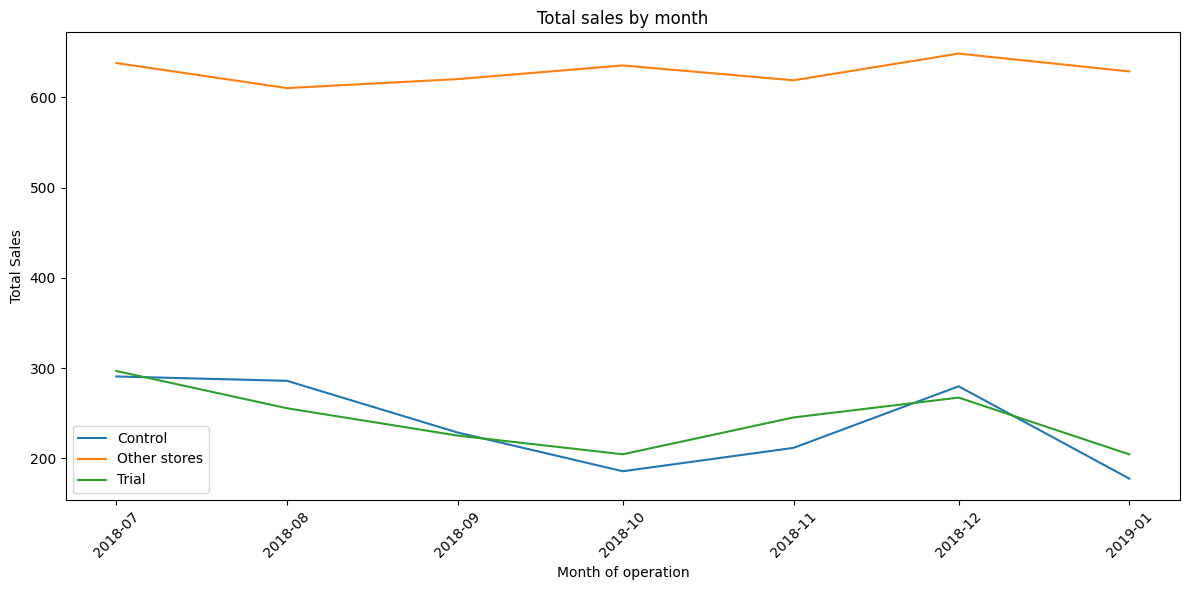

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a transaction_month column by converting YEARMONTH to datetime
def prepare_sales_data(measure_over_time, trial_store, control_store):
    """
    Prepares data for visualization by grouping and categorizing stores.
    
    Args:
    - measure_over_time: The full DataFrame to process.
    - trial_store: The trial store number.
    - control_store: The control store number.

    Returns:
    - A processed DataFrame suitable for visualization.
    """
    # Classify store types
    measure_over_time['Store_type'] = measure_over_time['STORE_NBR'].apply(
        lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
    )

    # Aggregate average sales by month and store type
    aggregated_sales = measure_over_time.groupby(['YEARMONTH', 'Store_type'])['totsales'].mean().reset_index()

    # Convert YEARMONTH to datetime
    aggregated_sales['TransactionMonth'] = pd.to_datetime(aggregated_sales['YEARMONTH'].astype(str), format='%Y%m')
    
    # Filter data for visualization (months before March 2019)
    past_sales = aggregated_sales[aggregated_sales['TransactionMonth'] < pd.to_datetime("2019-03-01")]
    
    return past_sales


# Example usage with hypothetical measure_over_time
trial_store = 77
control_store = 233  # Replace with computed/actual control store number
measure_over_time = pre_trial_measures  # Input DataFrame should contain 'STORE_NBR', 'YEARMONTH', 'totSales'

# Preprocess the data
past_sales = prepare_sales_data(measure_over_time, trial_store, control_store)

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=past_sales, x='TransactionMonth', y='totsales', hue='Store_type')
plt.xlabel("Month of operation")
plt.ylabel("Total Sales")
plt.title("Total sales by month")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\arvin\AppData\Local\Temp\ipykernel_10084\1540040070.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measure_over_time['Store_type'] = measure_over_time['STORE_NBR'].apply(


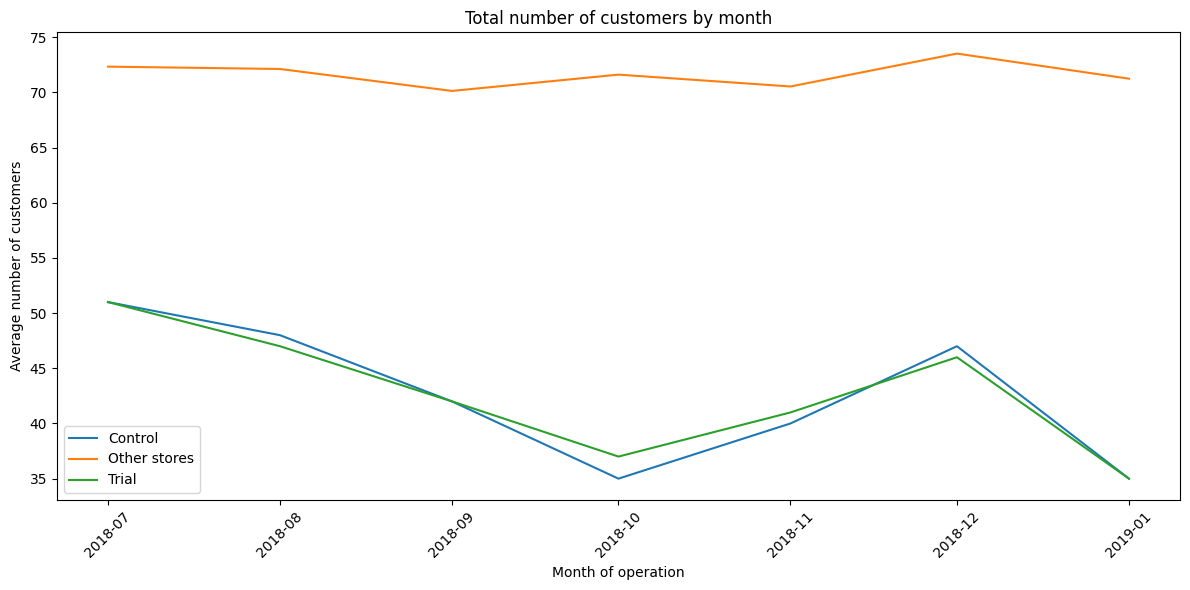

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Prepare data for visualization
def prepare_customer_data(measure_over_time, trial_store, control_store):
    """
    Prepares data for visualization by grouping and categorizing stores.
    
    Args:
    - measure_over_time: DataFrame with necessary data to process.
    - trial_store: The trial store number.
    - control_store: The control store number.

    Returns:
    - Preprocessed DataFrame for visualization.
    """
    # Classify store types
    measure_over_time['Store_type'] = measure_over_time['STORE_NBR'].apply(
        lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
    )

    # Group by month and compute average number of customers
    aggregated_customers = measure_over_time.groupby(['YEARMONTH', 'Store_type'])['ncustomers'].mean().reset_index()

    # Convert YEARMONTH to datetime
    aggregated_customers['TransactionMonth'] = pd.to_datetime(aggregated_customers['YEARMONTH'].astype(str), format='%Y%m')
    
    # Filter data for visualization months < March 2019
    past_customers = aggregated_customers[aggregated_customers['TransactionMonth'] < pd.to_datetime("2019-03-01")]

    return past_customers


# Example usage with hypothetical data
trial_store = 77
control_store = 233  # Replace with the computed or actual control store number
measure_over_time = pre_trial_measures  # Input data with the necessary fields: 'STORE_NBR', 'YEARMONTH', 'nCustomers'

# Preprocess the data
past_customers = prepare_customer_data(measure_over_time, trial_store, control_store)

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=past_customers, x='TransactionMonth', y='ncustomers', hue='Store_type')
plt.xlabel("Month of operation")
plt.ylabel("Average number of customers")
plt.title("Total number of customers by month")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


***Assessment of trial
The trial period goes from the start of March 2019 to June 2019. We now want to see if there has been an
uplift in overall chip sales.
We’ll start with scaling the control store’s sales to a level similar to control for any differences between the
two stores outside of the trial period.***

In [224]:
# Calculate the scaling factor for control sales
scaling_factor_for_control_sales = (
    pre_trial_measures[
        (pre_trial_measures["STORE_NBR"] == trial_store) & 
        (pre_trial_measures["YEARMONTH"] < 201902)
    ]["totsales"].sum()
    /
    pre_trial_measures[
        (pre_trial_measures["STORE_NBR"] == control_store) & 
        (pre_trial_measures["YEARMONTH"] < 201902)
    ]["totsales"].sum()
)

print("Scaling Factor for Control Sales:", scaling_factor_for_control_sales)


Scaling Factor for Control Sales: 1.023617303289553


In [265]:
# Apply the scaling factor to control store sales
pretrial.loc[
    pretrial["STORE_NBR"] == control_store, "scaledControlSales"
] = (
    pretrial.loc[
        pretrial["STORE_NBR"] == control_store, "totsales"
    ] * scaling_factor_for_control_sales
)

scaled_control_sales = pretrial[pretrial["STORE_NBR"] == control_store] # Display the updated DataFrame
scaled_control_sales

,YEARMONTH,STORE_NBR,totsales,ncustomers,TxnperCus_raw,total_qty,TxnperCus,NchipsCus,avgPPU,scaledControlSales
227,201807,233,290.7,51,54,88,1.058824,1.725490,3.303409,297.565550
489,201808,233,285.9,48,50,80,1.041667,1.666667,3.573750,292.652187
754,201809,233,228.6,42,45,70,1.071429,1.666667,3.265714,233.998916
1019,201810,233,185.7,35,36,56,1.028571,1.600000,3.316071,190.085733
1283,201811,233,211.6,40,41,62,1.025000,1.550000,3.412903,216.597421
1546,201812,233,279.8,47,50,75,1.063830,1.595745,3.730667,286.408121
1809,201901,233,177.5,35,35,47,1.000000,1.342857,3.776596,181.692071
2073,201902,233,244.0,45,47,70,1.044444,1.555556,3.485714,249.762622
2337,201903,233,199.1,40,41,59,1.025000,1.475000,3.374576,203.802205
2603,201904,233,158.6,30,33,46,1.100000,1.533333,3.447826,162.345704


Now that we have comparable sales figures for the control store, we can calculate the percentage difference between the scaled control sales and the trial store’s sales during the trial period.

In [266]:
# Merge the scaled control sales data with the trial store's sales data on YEARMONTH
percentage_diff = pd.merge(
    scaled_control_sales[["YEARMONTH", "totsales"]],
    pretrial[pretrial["STORE_NBR"] == trial_store][["totsales", "YEARMONTH"]],
    on="YEARMONTH"
)
# Calculate the percentage difference between scaled control sales and trial store sales
percentage_diff["percentageDiff"] = (
    abs(percentage_diff["totsales_y"] - percentage_diff["totsales_x"]) / percentage_diff["totsales_y"]
)

# Display the result
print(percentage_diff)

    YEARMONTH  totsales_x  totsales_y  percentageDiff
0      201807       290.7       296.8        0.020553
1      201808       285.9       255.5        0.118982
2      201809       228.6       225.2        0.015098
3      201810       185.7       204.5        0.091932
4      201811       211.6       245.3        0.137383
5      201812       279.8       267.3        0.046764
6      201901       177.5       204.4        0.131605
7      201902       244.0       235.0        0.038298
8      201903       199.1       278.5        0.285099
9      201904       158.6       263.5        0.398102
10     201905       344.4       299.3        0.150685
11     201906       221.0       264.7        0.165093


**As our null hypothesis is that the trial period is the same as the
 pre‐trial period, lets take the standard deviation based on the scaled
 percentage difference in the pre‐trialperiod**

In [270]:
# Filter the percentage_diff DataFrame for the pre-trial period (YEARMONTH < 201902)
pre_trial_percentage_diff = percentage_diff[percentage_diff["YEARMONTH"] < 201902]["percentageDiff"]

# Calculate the standard deviation for the pre-trial period
stdDev = pre_trial_percentage_diff.std()

# Display the updated DataFrame
percentage_diff


,YEARMONTH,totsales_x,totsales_y,percentageDiff,stdDev,tValue,TransactionMonth
0,201807,290.7,296.8,0.020553,0.05239,0.392303,2018-07-01
1,201808,285.9,255.5,0.118982,0.05239,2.271109,2018-08-01
2,201809,228.6,225.2,0.015098,0.05239,0.288181,2018-09-01
3,201810,185.7,204.5,0.091932,0.05239,1.754768,2018-10-01
4,201811,211.6,245.3,0.137383,0.05239,2.622332,2018-11-01
5,201812,279.8,267.3,0.046764,0.05239,0.892619,2018-12-01
6,201901,177.5,204.4,0.131605,0.05239,2.512041,2019-01-01
7,201902,244.0,235.0,0.038298,0.05239,0.731021,2019-02-01
8,201903,199.1,278.5,0.285099,0.05239,5.441900,2019-03-01
9,201904,158.6,263.5,0.398102,0.05239,7.598889,2019-04-01


In [271]:
# Degrees of freedom for the pre-trial period
degreesOfFreedom = 7

# Display the result
print("Degrees of Freedom for the Pre-trial Period:", degreesOfFreedom)


Degrees of Freedom for the Pre-trial Period: 7


**We will test with the null hypothesis that there is no difference between the trial and control stores.**

In [273]:
# Calculate the t-value based on the null hypothesis (0 difference between trial and control stores)
percentage_diff["tValue"] = (percentage_diff["percentageDiff"] - 0) / stdDev

# Create the 'TransactionMonth' column by converting YEARMONTH to a date (use 1st day of each month)
percentage_diff["TransactionMonth"] = pd.to_datetime(
    percentage_diff["YEARMONTH"].astype(str).str[:4] + '-' + percentage_diff["YEARMONTH"].astype(str).str[4:6] + '-01'
)

# Filter the data for the trial period (YEARMONTH between 201901 and 201905)
filtered_data = percentage_diff[(percentage_diff["YEARMONTH"] > 201901) & (percentage_diff["YEARMONTH"] < 201905)]

# Select the columns 'TransactionMonth' and 'tValue'
result = filtered_data[["TransactionMonth", "tValue"]]

# Display the result
print(result)

  TransactionMonth    tValue
7       2019-02-01  0.731021
8       2019-03-01  5.441900
9       2019-04-01  7.598889


In [278]:
import scipy.stats as stats
t_95th_percentile = stats.t.ppf(0.95, df=degrees_of_freedom)

# Display the result
print(f"The 95th percentile of the t-distribution with {degrees_of_freedom} degrees of freedom is: {t_95th_percentile}")

The 95th percentile of the t-distribution with 7 degrees of freedom is: 1.894578605061305


**We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for March and April. This means that the increase in sales in the trial store during March and April is statistically greater than in the control store. To visualize this, let's plot the sales of the control store, the sales of the trial store, and the 95th percentile value of sales for the control store.**

In [295]:
 measure_over_time_sales = pretrial.copy()
    # Create the 'Store_type' column
measure_over_time_sales['Store_type'] = measure_over_time_sales['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
)

# Calculate the mean 'totSales' by 'YEARMONTH' and 'Store_type'
mean_sales = measure_over_time_sales.groupby(['YEARMONTH', 'Store_type'], as_index=False)['totsales'].mean()

# Create the 'TransactionMonth' column
mean_sales['TransactionMonth'] = pd.to_datetime(mean_sales['YEARMONTH'].astype(str).str[:4] + '-' + mean_sales['YEARMONTH'].astype(str).str[4:6] + '-01')

# Filter for only 'Trial' and 'Control' stores
past_sales = mean_sales[mean_sales['Store_type'].isin(['Trial', 'Control'])]

# Display the result
past_sales

,YEARMONTH,Store_type,totsales,TransactionMonth
0,201807,Control,290.7,2018-07-01
2,201807,Trial,296.8,2018-07-01
3,201808,Control,285.9,2018-08-01
5,201808,Trial,255.5,2018-08-01
6,201809,Control,228.6,2018-09-01
8,201809,Trial,225.2,2018-09-01
9,201810,Control,185.7,2018-10-01
11,201810,Trial,204.5,2018-10-01
12,201811,Control,211.6,2018-11-01
14,201811,Trial,245.3,2018-11-01


**Control store 95th percentile**

In [296]:
# Filter the data for control stores
past_sales_control = past_sales[past_sales['Store_type'] == 'Control']

# Adjust the 'totSales' by multiplying with (1 + stdDev * 2)
past_sales_control['totSales'] = past_sales_control['totsales'] * (1 + stdDev * 2)

# Update the 'Store_type' to reflect the 95th percentile confidence interval
past_sales_control['Store_type'] = 'Control95th%confidence interval'

# Display the result
past_sales_control

C:\Users\arvin\AppData\Local\Temp\ipykernel_10084\3428241857.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_sales_control['totSales'] = past_sales_control['totsales'] * (1 + stdDev * 2)
C:\Users\arvin\AppData\Local\Temp\ipykernel_10084\3428241857.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_sales_control['Store_type'] = 'Control95th%confidence interval'


,YEARMONTH,Store_type,totsales,TransactionMonth,totSales
0,201807,Control95th%confidence interval,290.7,2018-07-01,321.159290
3,201808,Control95th%confidence interval,285.9,2018-08-01,315.856350
6,201809,Control95th%confidence interval,228.6,2018-09-01,252.552507
9,201810,Control95th%confidence interval,185.7,2018-10-01,205.157483
12,201811,Control95th%confidence interval,211.6,2018-11-01,233.771262
15,201812,Control95th%confidence interval,279.8,2018-12-01,309.117198
18,201901,Control95th%confidence interval,177.5,2019-01-01,196.098294
21,201902,Control95th%confidence interval,244.0,2019-02-01,269.566105
24,201903,Control95th%confidence interval,199.1,2019-03-01,219.961523
27,201904,Control95th%confidence interval,158.6,2019-04-01,175.217968


**Control store 95th percentile**

In [297]:
past_sales_control = past_sales[past_sales['Store_type'] == 'Control']

# Adjust the 'totSales' for the 95th percentile (multiply by (1 + stdDev * 2))
past_sales_control_95th = past_sales_control.copy()
past_sales_control_95th['totsales'] = past_sales_control_95th['totsales'] * (1 + stdDev * 2)
past_sales_control_95th['Store_type'] = 'Control95th%confidence interval'

# Adjust the 'totSales' for the 5th percentile (multiply by (1 - stdDev * 2))
past_sales_control_5th = past_sales_control.copy()
past_sales_control_5th['totsales'] = past_sales_control_5th['totsales'] * (1 - stdDev * 2)
past_sales_control_5th['Store_type'] = 'Control5th%confidence interval'

# Combine all DataFrames (pastSales, pastSales_Controls95, and pastSales_Controls5)
trial_assessment = pd.concat([past_sales, past_sales_control_95th, past_sales_control_5th])

# Display the final result
trial_assessment

,YEARMONTH,Store_type,totsales,TransactionMonth
0,201807,Control,290.700000,2018-07-01
2,201807,Trial,296.800000,2018-07-01
3,201808,Control,285.900000,2018-08-01
5,201808,Trial,255.500000,2018-08-01
6,201809,Control,228.600000,2018-09-01
8,201809,Trial,225.200000,2018-09-01
9,201810,Control,185.700000,2018-10-01
11,201810,Trial,204.500000,2018-10-01
12,201811,Control,211.600000,2018-11-01
14,201811,Trial,245.300000,2018-11-01


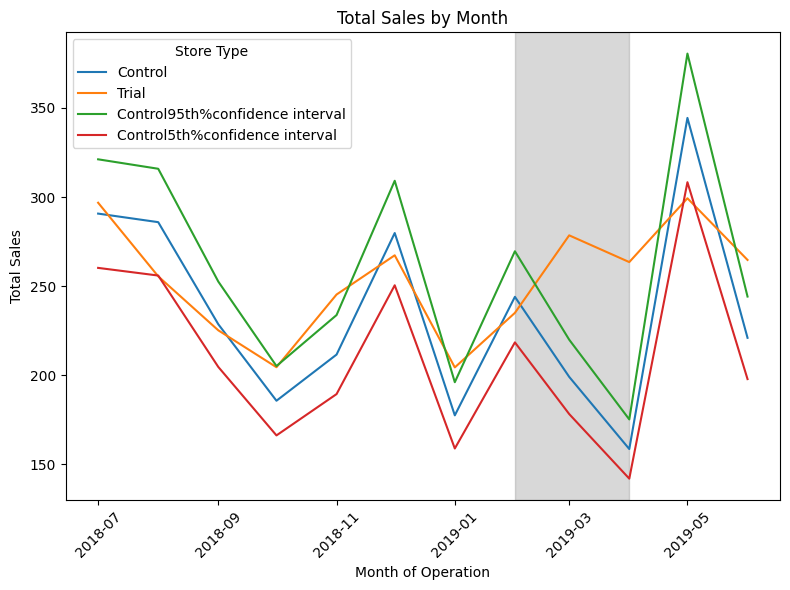

In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'trial_assessment' is your DataFrame containing the necessary data

# Filter the data for the trial period (201901 to 201905)
trial_period_data = trial_assessment[(trial_assessment['YEARMONTH'] > 201901) & (trial_assessment['YEARMONTH'] < 201905)]

# Create the plot
plt.figure(figsize=(8, 6))

# Create the shaded region for the trial period
plt.axvspan(
    min(filtered_data['TransactionMonth']),
    max(filtered_data['TransactionMonth']),
    color='gray', alpha=0.3
)

# Plot the lines for total sales, colored by store type
sns.lineplot(data=trial_assessment, x='TransactionMonth', y='totsales', hue='Store_type')

# Set labels and title
plt.xlabel("Month of Operation")
plt.ylabel("Total Sales")
plt.title("Total Sales by Month")

# Add legend and grid
plt.legend(title="Store Type")


# Display the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()


The results show that the trial store 77 is significantly different from its control store during the trial period, as the trial store's performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months. Let's also assess this for the number of customers.

**Let’s have a look at assessing this for number of customers as well.**

In [328]:
scaling_factor_for_control_cust = pre_trial_measures[
    (pre_trial_measures['STORE_NBR'] == trial_store) & (pre_trial_measures['YEARMONTH'] < 201902)
]['ncustomers'].sum() / pre_trial_measures[
    (pre_trial_measures['STORE_NBR'] == control_store) & (pre_trial_measures['YEARMONTH'] < 201902)
]['ncustomers'].sum()


In [330]:
measure_over_time_custs = pretrial.copy()
# Apply the scaling factor to control customers
scaled_control_customers = measure_over_time_custs[measure_over_time_custs['STORE_NBR'] == control_store].copy()

# Scale 'nCustomers' for control stores using the scaling factor
scaled_control_customers['controlCustomers'] = scaled_control_customers['ncustomers'] * scaling_factor_for_control_cust

# Create 'Store_type' column based on STORE_NBR
scaled_control_customers['Store_type'] = scaled_control_customers['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Otherstores')
)


In [332]:
# Merging the data
merged_data = pd.merge(
    scaled_control_customers[['YEARMONTH', 'controlCustomers']],  # Selecting relevant columns from scaled_control_customers
    measure_over_time_custs[measure_over_time_custs['STORE_NBR'] == trial_store][['ncustomers', 'YEARMONTH']],  # Filtering for trial store
    on='YEARMONTH',  # Merge on YEARMONTH
    how='inner'  # Ensure an inner join to only include matching rows
)

# Calculate percentage difference
merged_data['percentageDiff'] = abs(merged_data['controlCustomers'] - merged_data['ncustomers']) / merged_data['controlCustomers']


In [333]:
# Filtering the data for YEARMONTH < 201902
filtered_data = merged_data[merged_data['YEARMONTH'] < 201902]

# Calculate the standard deviation of the 'percentageDiff' column
std_dev = filtered_data['percentageDiff'].std()


In [336]:
measure_over_time_custs['Store_type'] = measure_over_time_custs['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
)

In [337]:
# Group by 'YEARMONTH' and 'Store_type' to calculate the mean of 'nCustomers'
past_customers = measure_over_time_custs.groupby(['YEARMONTH', 'Store_type'], as_index=False)['ncustomers'].mean()

# Filter the data for 'Trial' and 'Control' store types
past_customers = past_customers[past_customers['Store_type'].isin(['Trial', 'Control'])]


**control store 95th percentile**

In [339]:
# Filter for Control store and apply the 95th percentile scaling
past_customers_controls_95 = past_customers[past_customers['Store_type'] == 'Control'].copy()

# Calculate the 95th percentile nCusts using the standard deviation (stdDev)
past_customers_controls_95['ncustomers'] = past_customers_controls_95['ncustomers'] * (1 + stdDev * 2)

# Update the Store_type to indicate this is for the 95th percentile confidence interval
past_customers_controls_95['Store_type'] = 'Control95th%confidence interval'


**control store 5th percentile**

In [346]:
# Filter for Control store and apply the 5th percentile scaling
past_customers_controls_5 = past_customers[past_customers['Store_type'] == 'Control'].copy()

# Calculate the 5th percentile nCusts using the standard deviation (stdDev)
past_customers_controls_5['ncustomers'] = past_customers_controls_5['ncustomers'] * (1 - stdDev * 2)

# Update the Store_type to indicate this is for the 5th percentile confidence interval
past_customers_controls_5['Store_type'] = 'Control5th%confidence interval'
# Combine the dataframes by rows (equivalent to rbind in R)
trial_assessment = pd.concat([past_customers, past_customers_controls_95, past_customers_controls_5], ignore_index=True)
trial_assessment

,YEARMONTH,Store_type,ncustomers
0,201807,Control,51.000000
1,201807,Trial,51.000000
2,201808,Control,48.000000
3,201808,Trial,47.000000
4,201809,Control,42.000000
5,201809,Trial,42.000000
6,201810,Control,35.000000
7,201810,Trial,37.000000
8,201811,Control,40.000000
9,201811,Trial,41.000000


In [360]:
# Convert YEARMONTH to datetime with the first day of the month
trial_assessment['TransactionMonth'] = pd.to_datetime(
    trial_assessment['YEARMONTH'].astype(str).apply(lambda x: x[:4] + '-' + x[4:6] + '-01')
)

# Display the first few rows to check the result
print(trial_assessment[['YEARMONTH', 'TransactionMonth']].head())
trial_assessment

   YEARMONTH TransactionMonth
0     201807       2018-07-01
1     201807       2018-07-01
2     201808       2018-08-01
3     201808       2018-08-01
4     201809       2018-09-01


,YEARMONTH,Store_type,ncustomers,TransactionMonth
0,201807,Control,51.000000,2018-07-01
1,201807,Trial,51.000000,2018-07-01
2,201808,Control,48.000000,2018-08-01
3,201808,Trial,47.000000,2018-08-01
4,201809,Control,42.000000,2018-09-01
5,201809,Trial,42.000000,2018-09-01
6,201810,Control,35.000000,2018-10-01
7,201810,Trial,37.000000,2018-10-01
8,201811,Control,40.000000,2018-11-01
9,201811,Trial,41.000000,2018-11-01


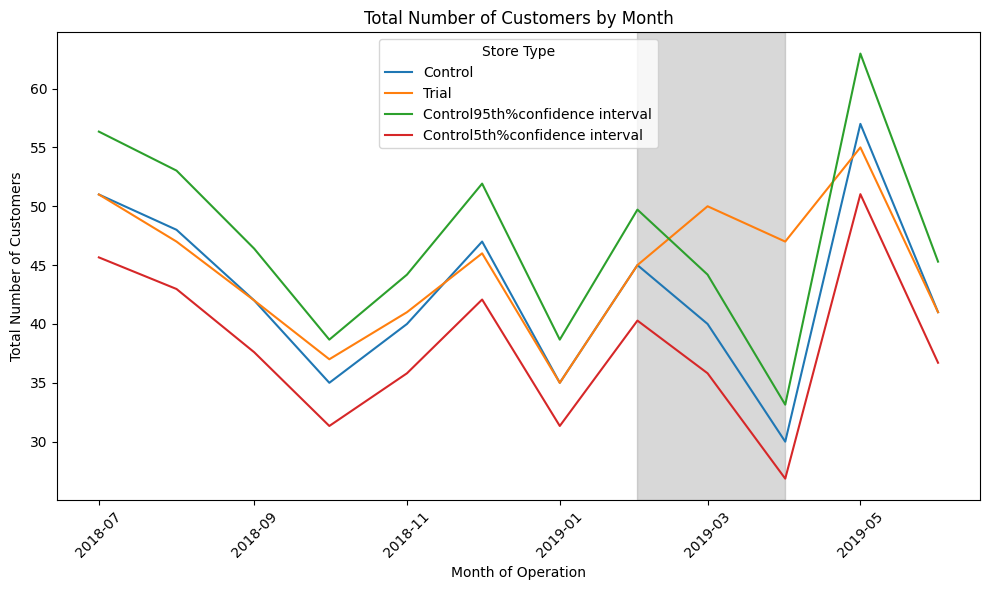

In [366]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter the trial period (YEARMONTH between 201901 and 201905)
trial_period_data = trial_assessment[(trial_assessment['YEARMONTH'] > 201901) & (trial_assessment['YEARMONTH'] < 201905)]

# Create the plot
plt.figure(figsize=(10, 6))

# Create the shaded region for the trial period
plt.axvspan(
    min(trial_period_data['TransactionMonth']),
    max(trial_period_data['TransactionMonth']),
    color='gray', alpha=0.3
)

# Plot the lines for total customers, colored by store type
sns.lineplot(data=trial_assessment, x='TransactionMonth', y='ncustomers', hue='Store_type')

# Set labels and title
plt.xlabel("Month of Operation")
plt.ylabel("Total Number of Customers")
plt.title("Total Number of Customers by Month")
plt.legend(title="Store Type")

# Display the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()


**Lets do the same for trial store 86**

In [367]:
# Example trial store number
trial_store = 86

# Calculate correlation for 'totSales' metric
corr_nSales = calculate_correlation(pre_trial_measures, 'totsales', trial_store)

# Calculate correlation for 'nCustomers' metric
corr_nCustomers = calculate_correlation(pre_trial_measures, 'ncustomers', trial_store)

# Display results
print("Correlation results for total sales:")
print(corr_nSales)

print("\nCorrelation results for number of customers:")
print(corr_nCustomers)


Correlation results for total sales:
     Store1  Store2  corr_measure
0        86       1      0.445632
1        86       2     -0.403835
2        86       3     -0.261284
3        86       4     -0.039035
4        86       5      0.235159
..      ...     ...           ...
254      86     268     -0.452182
255      86     269      0.697055
256      86     270     -0.730679
257      86     271      0.527637
258      86     272      0.004926

[259 rows x 3 columns]

Correlation results for number of customers:
     Store1  Store2  corr_measure
0        86       1      0.485831
1        86       2     -0.086161
2        86       3     -0.353786
3        86       4     -0.169608
4        86       5     -0.253229
..      ...     ...           ...
254      86     268     -0.034273
255      86     269     -0.098587
256      86     270     -0.767267
257      86     271      0.267393
258      86     272     -0.353815

[259 rows x 3 columns]


In [368]:
# Calculate magnitude distance for 'totSales' metric
magnitude_nSales = calculate_magnitude_distance(pre_trial_measures, 'totsales', trial_store)

# Calculate magnitude distance for 'nCustomers' metric
magnitude_nCustomers = calculate_magnitude_distance(pre_trial_measures, 'ncustomers', trial_store)

# Display results
print("Magnitude distance results for total sales:")
print(magnitude_nSales)

print("\nMagnitude distance results for number of customers:")
print(magnitude_nCustomers)


Magnitude distance results for total sales:
     Store1  Store2  mag_measure
0        86       1     0.220565
1        86       2     0.179640
2        86       3     0.762894
3        86       4     0.498526
4        86       5     0.929321
..      ...     ...          ...
254      86     268     0.250819
255      86     269     0.902040
256      86     270     0.834520
257      86     271     0.922919
258      86     272     0.446702

[259 rows x 3 columns]

Magnitude distance results for number of customers:
     Store1  Store2  mag_measure
0        86       1     0.444597
1        86       2     0.380620
2        86       3     0.911850
3        86       4     0.773922
4        86       5     0.926509
..      ...     ...          ...
254      86     268     0.427390
255      86     269     0.917082
256      86     270     0.890489
257      86     271     0.935896
258      86     272     0.425196

[259 rows x 3 columns]


***We’ll need to combine the all the scores calculated using our function to create a composite score to rank
on.
Let’s take a simple average of the correlation and magnitude scores for each driver. Note that if we consider
it more important for the trend of the drivers to be similar, we can increase the weight of the correlation
score (a simple average gives a weight of 0.5 to the corr_weight) or if we consider the absolute size of the
drivers to be more important, we can lower the weight of the correlation score.***

In [369]:
# Set the weight for combining correlation and magnitude
corr_weight = 0.5

# Combine correlation and magnitude distances for 'nSales'
score_nSales = pd.merge(corr_nSales, magnitude_nSales, on=["Store1", "Store2"])
score_nSales['scoreNSales'] = (score_nSales['corr_measure'] * corr_weight) + \
                              (score_nSales['mag_measure'] * (1 - corr_weight))

# Combine correlation and magnitude distances for 'nCustomers'
score_nCustomers = pd.merge(corr_nCustomers, magnitude_nCustomers, on=["Store1", "Store2"])
score_nCustomers['scoreNCust'] = (score_nCustomers['corr_measure'] * corr_weight) + \
                                  (score_nCustomers['mag_measure'] * (1 - corr_weight))

# Display combined scores
print("Combined score for total sales:")
print(score_nSales)

print("\nCombined score for number of customers:")
print(score_nCustomers)


Combined score for total sales:
     Store1  Store2  corr_measure  mag_measure  scoreNSales
0        86       1      0.445632     0.220565     0.333099
1        86       2     -0.403835     0.179640    -0.112097
2        86       3     -0.261284     0.762894     0.250805
3        86       4     -0.039035     0.498526     0.229745
4        86       5      0.235159     0.929321     0.582240
..      ...     ...           ...          ...          ...
254      86     268     -0.452182     0.250819    -0.100681
255      86     269      0.697055     0.902040     0.799548
256      86     270     -0.730679     0.834520     0.051921
257      86     271      0.527637     0.922919     0.725278
258      86     272      0.004926     0.446702     0.225814

[259 rows x 5 columns]

Combined score for number of customers:
     Store1  Store2  corr_measure  mag_measure  scoreNCust
0        86       1      0.485831     0.444597    0.465214
1        86       2     -0.086161     0.380620    0.147230
2     

In [370]:
# Combine scores across the two drivers (total sales and number of customers)
score_control = pd.merge(score_nSales, score_nCustomers, on=["Store1", "Store2"])

# Calculate the final control score as a simple average of scoreNSales and scoreNCust
score_control['finalControlScore'] = (score_control['scoreNSales'] * 0.5) + \
                                      (score_control['scoreNCust'] * 0.5)

# Display the combined results
print("Final combined control scores:")

score_control.sort_values(by='finalControlScore',ascending=False)

Final combined control scores:


,Store1,Store2,corr_measure_x,mag_measure_x,scoreNSales,corr_measure_y,mag_measure_y,scoreNCust,finalControlScore
146,86,155,0.877882,0.964782,0.921332,0.942876,0.985037,0.963956,0.942644
101,86,109,0.788300,0.963810,0.876055,0.770778,0.965940,0.868359,0.872207
106,86,114,0.734415,0.921021,0.827718,0.855339,0.935508,0.895424,0.861571
129,86,138,0.759864,0.925434,0.842649,0.749701,0.928031,0.838866,0.840757
212,86,225,0.617533,0.958060,0.787796,0.733791,0.967367,0.850579,0.819188
...,...,...,...,...,...,...,...,...,...
100,86,108,-0.840413,0.342197,-0.249108,-0.697245,0.344397,-0.176424,-0.212766
48,86,52,-0.601629,0.034355,-0.283637,-0.594459,0.041166,-0.276647,-0.280142
111,86,120,-0.872693,0.172948,-0.349872,-0.815097,0.375671,-0.219713,-0.284793
39,86,42,-0.745720,0.019813,-0.362953,-0.664952,0.040272,-0.312340,-0.337647


C:\Users\arvin\AppData\Local\Temp\ipykernel_10084\3386389337.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measure_over_time['Store_type'] = measure_over_time['STORE_NBR'].apply(


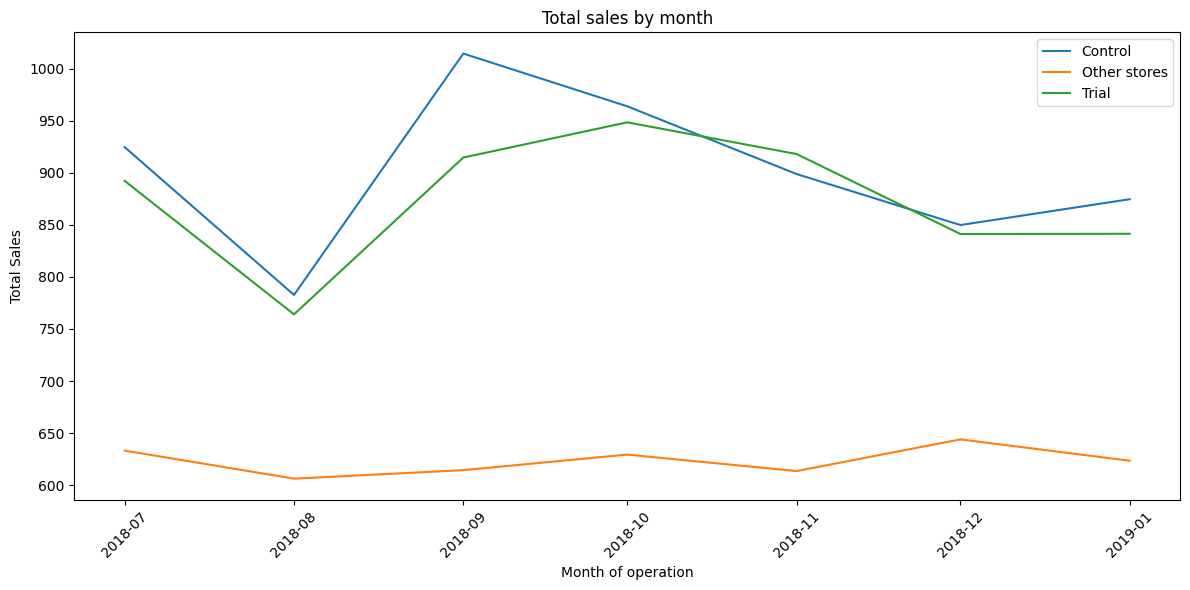

In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a transaction_month column by converting YEARMONTH to datetime
def prepare_sales_data(measure_over_time, trial_store, control_store):
    """
    Prepares data for visualization by grouping and categorizing stores.
    
    Args:
    - measure_over_time: The full DataFrame to process.
    - trial_store: The trial store number.
    - control_store: The control store number.

    Returns:
    - A processed DataFrame suitable for visualization.
    """
    # Classify store types
    measure_over_time['Store_type'] = measure_over_time['STORE_NBR'].apply(
        lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
    )

    # Aggregate average sales by month and store type
    aggregated_sales = measure_over_time.groupby(['YEARMONTH', 'Store_type'])['totsales'].mean().reset_index()

    # Convert YEARMONTH to datetime
    aggregated_sales['TransactionMonth'] = pd.to_datetime(aggregated_sales['YEARMONTH'].astype(str), format='%Y%m')
    
    # Filter data for visualization (months before March 2019)
    past_sales = aggregated_sales[aggregated_sales['TransactionMonth'] < pd.to_datetime("2019-03-01")]
    
    return past_sales



trial_store = 86
control_store = 155  # Replace with computed/actual control store number
measure_over_time = pre_trial_measures  # Input DataFrame should contain 'STORE_NBR', 'YEARMONTH', 'totSales'

# Preprocess the data
past_sales = prepare_sales_data(measure_over_time, trial_store, control_store)

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=past_sales, x='TransactionMonth', y='totsales', hue='Store_type')
plt.xlabel("Month of operation")
plt.ylabel("Total Sales")
plt.title("Total sales by month")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\arvin\AppData\Local\Temp\ipykernel_10084\3828152431.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measure_over_time['Store_type'] = measure_over_time['STORE_NBR'].apply(


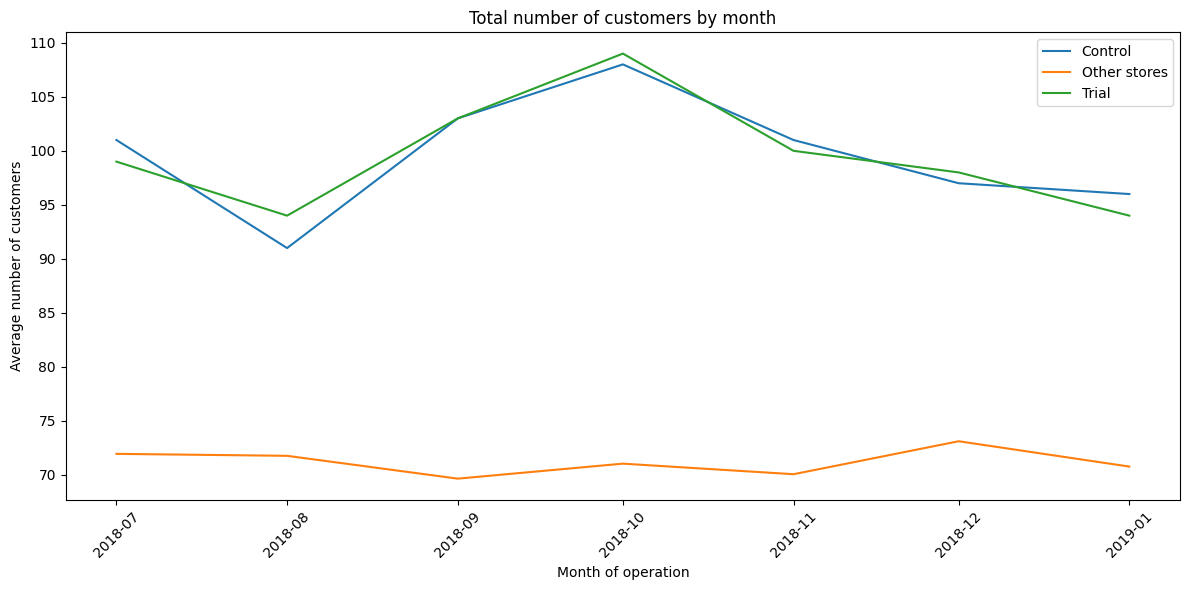

In [374]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Prepare data for visualization
def prepare_customer_data(measure_over_time, trial_store, control_store):
    """
    Prepares data for visualization by grouping and categorizing stores.
    
    Args:
    - measure_over_time: DataFrame with necessary data to process.
    - trial_store: The trial store number.
    - control_store: The control store number.

    Returns:
    - Preprocessed DataFrame for visualization.
    """
    # Classify store types
    measure_over_time['Store_type'] = measure_over_time['STORE_NBR'].apply(
        lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
    )

    # Group by month and compute average number of customers
    aggregated_customers = measure_over_time.groupby(['YEARMONTH', 'Store_type'])['ncustomers'].mean().reset_index()

    # Convert YEARMONTH to datetime
    aggregated_customers['TransactionMonth'] = pd.to_datetime(aggregated_customers['YEARMONTH'].astype(str), format='%Y%m')
    
    # Filter data for visualization months < March 2019
    past_customers = aggregated_customers[aggregated_customers['TransactionMonth'] < pd.to_datetime("2019-03-01")]

    return past_customers


# Example usage with hypothetical data
trial_store = 86
control_store = 155  # Replace with the computed or actual control store number
measure_over_time = pre_trial_measures  # Input data with the necessary fields: 'STORE_NBR', 'YEARMONTH', 'nCustomers'

# Preprocess the data
past_customers = prepare_customer_data(measure_over_time, trial_store, control_store)

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=past_customers, x='TransactionMonth', y='ncustomers', hue='Store_type')
plt.xlabel("Month of operation")
plt.ylabel("Average number of customers")
plt.title("Total number of customers by month")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


***Assessment of trial
The trial period goes from the start of March 2019 to June 2019. We now want to see if there has been an
uplift in overall chip sales.
We’ll start with scaling the control store’s sales to a level similar to control for any differences between the
two stores outside of the trial period.***

In [375]:
# Calculate the scaling factor for control sales
scaling_factor_for_control_sales = (
    pre_trial_measures[
        (pre_trial_measures["STORE_NBR"] == trial_store) & 
        (pre_trial_measures["YEARMONTH"] < 201902)
    ]["totsales"].sum()
    /
    pre_trial_measures[
        (pre_trial_measures["STORE_NBR"] == control_store) & 
        (pre_trial_measures["YEARMONTH"] < 201902)
    ]["totsales"].sum()
)

print("Scaling Factor for Control Sales:", scaling_factor_for_control_sales)


Scaling Factor for Control Sales: 0.9700651481287743


In [376]:
# Apply the scaling factor to control store sales
pretrial.loc[
    pretrial["STORE_NBR"] == control_store, "scaledControlSales"
] = (
    pretrial.loc[
        pretrial["STORE_NBR"] == control_store, "totsales"
    ] * scaling_factor_for_control_sales
)

scaled_control_sales = pretrial[pretrial["STORE_NBR"] == control_store] # Display the updated DataFrame
scaled_control_sales

,YEARMONTH,STORE_NBR,totsales,ncustomers,TxnperCus_raw,total_qty,TxnperCus,NchipsCus,avgPPU,scaledControlSales
150,201807,155,924.60,101,125,250,1.237624,2.475248,3.698400,896.922236
414,201808,155,782.70,91,120,229,1.318681,2.516484,3.417904,759.269991
679,201809,155,1014.40,103,145,290,1.407767,2.815534,3.497931,984.034086
944,201810,155,963.80,108,136,272,1.259259,2.518519,3.543382,934.948790
1208,201811,155,898.80,101,135,270,1.336634,2.673267,3.328889,871.894555
1472,201812,155,849.80,97,121,242,1.247423,2.494845,3.511570,824.361363
1733,201901,155,874.60,96,126,252,1.312500,2.625000,3.470635,848.418979
1997,201902,155,891.20,95,127,254,1.336842,2.673684,3.508661,864.522060
2262,201903,155,804.40,94,120,240,1.276596,2.553191,3.351667,780.320405
2526,201904,155,844.60,99,121,242,1.222222,2.444444,3.490083,819.317024


Now that we have comparable sales figures for the control store, we can calculate the percentage difference between the scaled control sales and the trial store’s sales during the trial period.

In [377]:
# Merge the scaled control sales data with the trial store's sales data on YEARMONTH
percentage_diff = pd.merge(
    scaled_control_sales[["YEARMONTH", "totsales"]],
    pretrial[pretrial["STORE_NBR"] == trial_store][["totsales", "YEARMONTH"]],
    on="YEARMONTH"
)
# Calculate the percentage difference between scaled control sales and trial store sales
percentage_diff["percentageDiff"] = (
    abs(percentage_diff["totsales_y"] - percentage_diff["totsales_x"]) / percentage_diff["totsales_y"]
)

# Display the result
print(percentage_diff)

    YEARMONTH  totsales_x  totsales_y  percentageDiff
0      201807      924.60      892.20        0.036315
1      201808      782.70      764.05        0.024409
2      201809     1014.40      914.60        0.109119
3      201810      963.80      948.40        0.016238
4      201811      898.80      918.00        0.020915
5      201812      849.80      841.20        0.010223
6      201901      874.60      841.40        0.039458
7      201902      891.20      913.20        0.024091
8      201903      804.40     1026.80        0.216595
9      201904      844.60      848.20        0.004244
10     201905      922.85      889.30        0.037726
11     201906      857.20      838.00        0.022912


**As our null hypothesis is that the trial period is the same as the
 pre‐trial period, lets take the standard deviation based on the scaled
 percentage difference in the pre‐trialperiod**

In [379]:
# Filter the percentage_diff DataFrame for the pre-trial period (YEARMONTH < 201902)
pre_trial_percentage_diff = percentage_diff[percentage_diff["YEARMONTH"] < 201902]["percentageDiff"]

# Calculate the standard deviation for the pre-trial period
stdDev = pre_trial_percentage_diff.std()

# Display the updated DataFrame
percentage_diff


,YEARMONTH,totsales_x,totsales_y,percentageDiff
0,201807,924.60,892.20,0.036315
1,201808,782.70,764.05,0.024409
2,201809,1014.40,914.60,0.109119
3,201810,963.80,948.40,0.016238
4,201811,898.80,918.00,0.020915
5,201812,849.80,841.20,0.010223
6,201901,874.60,841.40,0.039458
7,201902,891.20,913.20,0.024091
8,201903,804.40,1026.80,0.216595
9,201904,844.60,848.20,0.004244


In [380]:
# Degrees of freedom for the pre-trial period
degreesOfFreedom = 7

# Display the result
print("Degrees of Freedom for the Pre-trial Period:", degreesOfFreedom)


Degrees of Freedom for the Pre-trial Period: 7


In [381]:
# Calculate the t-value based on the null hypothesis (0 difference between trial and control stores)
percentage_diff["tValue"] = (percentage_diff["percentageDiff"] - 0) / stdDev

# Create the 'TransactionMonth' column by converting YEARMONTH to a date (use 1st day of each month)
percentage_diff["TransactionMonth"] = pd.to_datetime(
    percentage_diff["YEARMONTH"].astype(str).str[:4] + '-' + percentage_diff["YEARMONTH"].astype(str).str[4:6] + '-01'
)

# Filter the data for the trial period (YEARMONTH between 201901 and 201905)
filtered_data = percentage_diff[(percentage_diff["YEARMONTH"] > 201901) & (percentage_diff["YEARMONTH"] < 201905)]

# Select the columns 'TransactionMonth' and 'tValue'
result = filtered_data[["TransactionMonth", "tValue"]]

# Display the result
print(result)

  TransactionMonth    tValue
7       2019-02-01  0.717082
8       2019-03-01  6.447053
9       2019-04-01  0.126333


In [382]:
import scipy.stats as stats
t_95th_percentile = stats.t.ppf(0.95, df=degrees_of_freedom)

# Display the result
print(f"The 95th percentile of the t-distribution with {degrees_of_freedom} degrees of freedom is: {t_95th_percentile}")

The 95th percentile of the t-distribution with 7 degrees of freedom is: 1.894578605061305


In [383]:
 measure_over_time_sales = pretrial.copy()
    # Create the 'Store_type' column
measure_over_time_sales['Store_type'] = measure_over_time_sales['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
)

# Calculate the mean 'totSales' by 'YEARMONTH' and 'Store_type'
mean_sales = measure_over_time_sales.groupby(['YEARMONTH', 'Store_type'], as_index=False)['totsales'].mean()

# Create the 'TransactionMonth' column
mean_sales['TransactionMonth'] = pd.to_datetime(mean_sales['YEARMONTH'].astype(str).str[:4] + '-' + mean_sales['YEARMONTH'].astype(str).str[4:6] + '-01')

# Filter for only 'Trial' and 'Control' stores
past_sales = mean_sales[mean_sales['Store_type'].isin(['Trial', 'Control'])]

# Display the result
past_sales

,YEARMONTH,Store_type,totsales,TransactionMonth
0,201807,Control,924.60,2018-07-01
2,201807,Trial,892.20,2018-07-01
3,201808,Control,782.70,2018-08-01
5,201808,Trial,764.05,2018-08-01
6,201809,Control,1014.40,2018-09-01
8,201809,Trial,914.60,2018-09-01
9,201810,Control,963.80,2018-10-01
11,201810,Trial,948.40,2018-10-01
12,201811,Control,898.80,2018-11-01
14,201811,Trial,918.00,2018-11-01


**Control store 95th Percentile**

In [384]:
# Filter the data for control stores
past_sales_control = past_sales[past_sales['Store_type'] == 'Control']

# Adjust the 'totSales' by multiplying with (1 + stdDev * 2)
past_sales_control['totSales'] = past_sales_control['totsales'] * (1 + stdDev * 2)

# Update the 'Store_type' to reflect the 95th percentile confidence interval
past_sales_control['Store_type'] = 'Control95th%confidence interval'

# Display the result
past_sales_control

C:\Users\arvin\AppData\Local\Temp\ipykernel_10084\3428241857.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_sales_control['totSales'] = past_sales_control['totsales'] * (1 + stdDev * 2)
C:\Users\arvin\AppData\Local\Temp\ipykernel_10084\3428241857.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_sales_control['Store_type'] = 'Control95th%confidence interval'


,YEARMONTH,Store_type,totsales,TransactionMonth,totSales
0,201807,Control95th%confidence interval,924.60,2018-07-01,986.725737
3,201808,Control95th%confidence interval,782.70,2018-08-01,835.291190
6,201809,Control95th%confidence interval,1014.40,2018-09-01,1082.559580
9,201810,Control95th%confidence interval,963.80,2018-10-01,1028.559664
12,201811,Control95th%confidence interval,898.80,2018-11-01,959.192183
15,201812,Control95th%confidence interval,849.80,2018-12-01,906.899775
18,201901,Control95th%confidence interval,874.60,2019-01-01,933.366137
21,201902,Control95th%confidence interval,891.20,2019-02-01,951.081524
24,201903,Control95th%confidence interval,804.40,2019-03-01,858.449257
27,201904,Control95th%confidence interval,844.60,2019-04-01,901.350376


In [385]:
past_sales_control = past_sales[past_sales['Store_type'] == 'Control']

# Adjust the 'totSales' for the 95th percentile (multiply by (1 + stdDev * 2))
past_sales_control_95th = past_sales_control.copy()
past_sales_control_95th['totsales'] = past_sales_control_95th['totsales'] * (1 + stdDev * 2)
past_sales_control_95th['Store_type'] = 'Control95th%confidence interval'

# Adjust the 'totSales' for the 5th percentile (multiply by (1 - stdDev * 2))
past_sales_control_5th = past_sales_control.copy()
past_sales_control_5th['totsales'] = past_sales_control_5th['totsales'] * (1 - stdDev * 2)
past_sales_control_5th['Store_type'] = 'Control5th%confidence interval'

# Combine all DataFrames (pastSales, pastSales_Controls95, and pastSales_Controls5)
trial_assessment = pd.concat([past_sales, past_sales_control_95th, past_sales_control_5th])

# Display the final result
trial_assessment

,YEARMONTH,Store_type,totsales,TransactionMonth
0,201807,Control,924.600000,2018-07-01
2,201807,Trial,892.200000,2018-07-01
3,201808,Control,782.700000,2018-08-01
5,201808,Trial,764.050000,2018-08-01
6,201809,Control,1014.400000,2018-09-01
8,201809,Trial,914.600000,2018-09-01
9,201810,Control,963.800000,2018-10-01
11,201810,Trial,948.400000,2018-10-01
12,201811,Control,898.800000,2018-11-01
14,201811,Trial,918.000000,2018-11-01


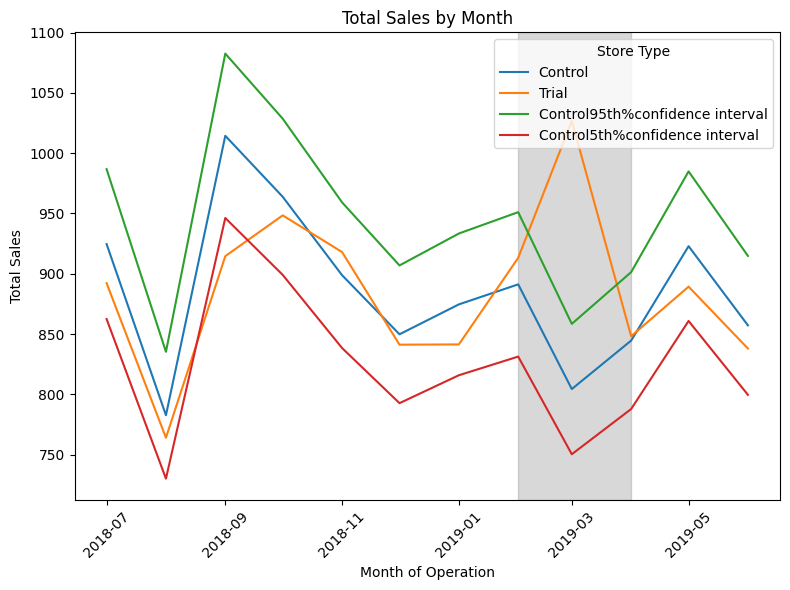

In [386]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'trial_assessment' is your DataFrame containing the necessary data

# Filter the data for the trial period (201901 to 201905)
trial_period_data = trial_assessment[(trial_assessment['YEARMONTH'] > 201901) & (trial_assessment['YEARMONTH'] < 201905)]

# Create the plot
plt.figure(figsize=(8, 6))

# Create the shaded region for the trial period
plt.axvspan(
    min(filtered_data['TransactionMonth']),
    max(filtered_data['TransactionMonth']),
    color='gray', alpha=0.3
)

# Plot the lines for total sales, colored by store type
sns.lineplot(data=trial_assessment, x='TransactionMonth', y='totsales', hue='Store_type')

# Set labels and title
plt.xlabel("Month of Operation")
plt.ylabel("Total Sales")
plt.title("Total Sales by Month")

# Add legend and grid
plt.legend(title="Store Type")


# Display the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()


The results show that the trial store (store 86) is not significantly different from its control store during the trial period, as the trial store's performance lies within the 5% to 95% confidence interval of the control store in two out of the three trial months. 

Let's now assess this for the number of customers as well.

In [387]:
scaling_factor_for_control_cust = pre_trial_measures[
    (pre_trial_measures['STORE_NBR'] == trial_store) & (pre_trial_measures['YEARMONTH'] < 201902)
]['ncustomers'].sum() / pre_trial_measures[
    (pre_trial_measures['STORE_NBR'] == control_store) & (pre_trial_measures['YEARMONTH'] < 201902)
]['ncustomers'].sum()


In [388]:
measure_over_time_custs = pretrial.copy()
# Apply the scaling factor to control customers
scaled_control_customers = measure_over_time_custs[measure_over_time_custs['STORE_NBR'] == control_store].copy()

# Scale 'nCustomers' for control stores using the scaling factor
scaled_control_customers['controlCustomers'] = scaled_control_customers['ncustomers'] * scaling_factor_for_control_cust

# Create 'Store_type' column based on STORE_NBR
scaled_control_customers['Store_type'] = scaled_control_customers['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Otherstores')
)


In [389]:
# Merging the data
merged_data = pd.merge(
    scaled_control_customers[['YEARMONTH', 'controlCustomers']],  # Selecting relevant columns from scaled_control_customers
    measure_over_time_custs[measure_over_time_custs['STORE_NBR'] == trial_store][['ncustomers', 'YEARMONTH']],  # Filtering for trial store
    on='YEARMONTH',  # Merge on YEARMONTH
    how='inner'  # Ensure an inner join to only include matching rows
)

# Calculate percentage difference
merged_data['percentageDiff'] = abs(merged_data['controlCustomers'] - merged_data['ncustomers']) / merged_data['controlCustomers']


In [390]:
# Filtering the data for YEARMONTH < 201902
filtered_data = merged_data[merged_data['YEARMONTH'] < 201902]

# Calculate the standard deviation of the 'percentageDiff' column
std_dev = filtered_data['percentageDiff'].std()


In [391]:
measure_over_time_custs['Store_type'] = measure_over_time_custs['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
)

In [393]:
# Group by 'YEARMONTH' and 'Store_type' to calculate the mean of 'nCustomers'
past_customers = measure_over_time_custs.groupby(['YEARMONTH', 'Store_type'], as_index=False)['ncustomers'].mean()

# Filter the data for 'Trial' and 'Control' store types
past_customers = past_customers[past_customers['Store_type'].isin(['Trial', 'Control'])]


**Control store 95th percentile**

In [394]:
# Filter for Control store and apply the 95th percentile scaling
past_customers_controls_95 = past_customers[past_customers['Store_type'] == 'Control'].copy()

# Calculate the 95th percentile nCusts using the standard deviation (stdDev)
past_customers_controls_95['ncustomers'] = past_customers_controls_95['ncustomers'] * (1 + stdDev * 2)

# Update the Store_type to indicate this is for the 95th percentile confidence interval
past_customers_controls_95['Store_type'] = 'Control95th%confidence interval'


**control store 5th percentile**

In [395]:
# Filter for Control store and apply the 5th percentile scaling
past_customers_controls_5 = past_customers[past_customers['Store_type'] == 'Control'].copy()

# Calculate the 5th percentile nCusts using the standard deviation (stdDev)
past_customers_controls_5['ncustomers'] = past_customers_controls_5['ncustomers'] * (1 - stdDev * 2)

# Update the Store_type to indicate this is for the 5th percentile confidence interval
past_customers_controls_5['Store_type'] = 'Control5th%confidence interval'
# Combine the dataframes by rows (equivalent to rbind in R)
trial_assessment = pd.concat([past_customers, past_customers_controls_95, past_customers_controls_5], ignore_index=True)
trial_assessment

,YEARMONTH,Store_type,ncustomers
0,201807,Control,101.000000
1,201807,Trial,99.000000
2,201808,Control,91.000000
3,201808,Trial,94.000000
4,201809,Control,103.000000
5,201809,Trial,103.000000
6,201810,Control,108.000000
7,201810,Trial,109.000000
8,201811,Control,101.000000
9,201811,Trial,100.000000


In [396]:
# Convert YEARMONTH to datetime with the first day of the month
trial_assessment['TransactionMonth'] = pd.to_datetime(
    trial_assessment['YEARMONTH'].astype(str).apply(lambda x: x[:4] + '-' + x[4:6] + '-01')
)

# Display the first few rows to check the result
print(trial_assessment[['YEARMONTH', 'TransactionMonth']].head())
trial_assessment

   YEARMONTH TransactionMonth
0     201807       2018-07-01
1     201807       2018-07-01
2     201808       2018-08-01
3     201808       2018-08-01
4     201809       2018-09-01


,YEARMONTH,Store_type,ncustomers,TransactionMonth
0,201807,Control,101.000000,2018-07-01
1,201807,Trial,99.000000,2018-07-01
2,201808,Control,91.000000,2018-08-01
3,201808,Trial,94.000000,2018-08-01
4,201809,Control,103.000000,2018-09-01
5,201809,Trial,103.000000,2018-09-01
6,201810,Control,108.000000,2018-10-01
7,201810,Trial,109.000000,2018-10-01
8,201811,Control,101.000000,2018-11-01
9,201811,Trial,100.000000,2018-11-01


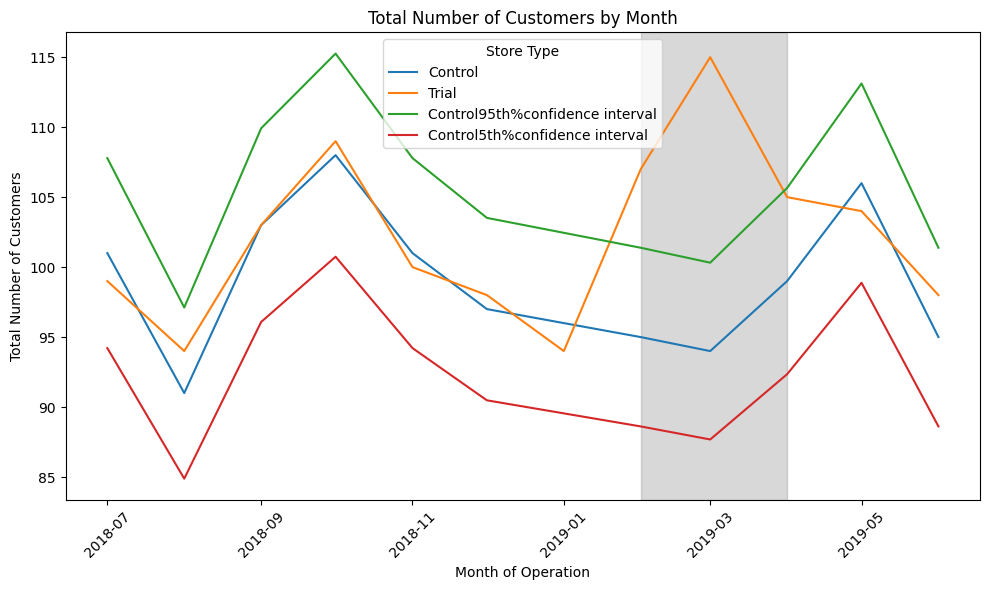

In [397]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter the trial period (YEARMONTH between 201901 and 201905)
trial_period_data = trial_assessment[(trial_assessment['YEARMONTH'] > 201901) & (trial_assessment['YEARMONTH'] < 201905)]

# Create the plot
plt.figure(figsize=(10, 6))

# Create the shaded region for the trial period
plt.axvspan(
    min(trial_period_data['TransactionMonth']),
    max(trial_period_data['TransactionMonth']),
    color='gray', alpha=0.3
)

# Plot the lines for total customers, colored by store type
sns.lineplot(data=trial_assessment, x='TransactionMonth', y='ncustomers', hue='Store_type')

# Set labels and title
plt.xlabel("Month of Operation")
plt.ylabel("Total Number of Customers")
plt.title("Total Number of Customers by Month")
plt.legend(title="Store Type")

# Display the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()


It looks like the number of customers is significantly higher in all three months. This seems to suggest that the trial had a significant impact on increasing the number of customers in trial store 86, but as we saw, sales were not significantly higher. We should check with the Category Manager if there were any special deals in the trial store that may have resulted in lower prices, impacting the results.

**TRIAL STORE 88**

In [399]:
# Example trial store number
trial_store = 88

# Calculate correlation for 'totSales' metric
corr_nSales = calculate_correlation(pre_trial_measures, 'totsales', trial_store)

# Calculate correlation for 'nCustomers' metric
corr_nCustomers = calculate_correlation(pre_trial_measures, 'ncustomers', trial_store)

# Display results
print("Correlation results for total sales:")
print(corr_nSales)

print("\nCorrelation results for number of customers:")
print(corr_nCustomers)


Correlation results for total sales:
     Store1  Store2  corr_measure
0        88       1      0.813636
1        88       2     -0.067927
2        88       3     -0.507847
3        88       4     -0.745566
4        88       5      0.190330
..      ...     ...           ...
254      88     268     -0.021429
255      88     269     -0.172578
256      88     270     -0.723272
257      88     271     -0.103037
258      88     272     -0.772772

[259 rows x 3 columns]

Correlation results for number of customers:
     Store1  Store2  corr_measure
0        88       1      0.305334
1        88       2     -0.452379
2        88       3      0.522884
3        88       4     -0.361503
4        88       5     -0.025320
..      ...     ...           ...
254      88     268      0.672672
255      88     269     -0.274781
256      88     270     -0.103032
257      88     271     -0.018831
258      88     272      0.026909

[259 rows x 3 columns]


In [400]:
# Calculate magnitude distance for 'totSales' metric
magnitude_nSales = calculate_magnitude_distance(pre_trial_measures, 'totsales', trial_store)

# Calculate magnitude distance for 'nCustomers' metric
magnitude_nCustomers = calculate_magnitude_distance(pre_trial_measures, 'ncustomers', trial_store)

# Display results
print("Magnitude distance results for total sales:")
print(magnitude_nSales)

print("\nMagnitude distance results for number of customers:")
print(magnitude_nCustomers)


Magnitude distance results for total sales:
     Store1  Store2  mag_measure
0        88       1     0.143453
1        88       2     0.116355
2        88       3     0.806064
3        88       4     0.901383
4        88       5     0.612614
..      ...     ...          ...
254      88     268     0.161613
255      88     269     0.712728
256      88     270     0.717650
257      88     271     0.615957
258      88     272     0.291095

[259 rows x 3 columns]

Magnitude distance results for number of customers:
     Store1  Store2  mag_measure
0        88       1     0.353668
1        88       2     0.302289
2        88       3     0.849307
3        88       4     0.930930
4        88       5     0.742127
..      ...     ...          ...
254      88     268     0.337873
255      88     269     0.852599
256      88     270     0.839071
257      88     271     0.743121
258      88     272     0.336616

[259 rows x 3 columns]


In [401]:
# Set the weight for combining correlation and magnitude
corr_weight = 0.5

# Combine correlation and magnitude distances for 'nSales'
score_nSales = pd.merge(corr_nSales, magnitude_nSales, on=["Store1", "Store2"])
score_nSales['scoreNSales'] = (score_nSales['corr_measure'] * corr_weight) + \
                              (score_nSales['mag_measure'] * (1 - corr_weight))

# Combine correlation and magnitude distances for 'nCustomers'
score_nCustomers = pd.merge(corr_nCustomers, magnitude_nCustomers, on=["Store1", "Store2"])
score_nCustomers['scoreNCust'] = (score_nCustomers['corr_measure'] * corr_weight) + \
                                  (score_nCustomers['mag_measure'] * (1 - corr_weight))

# Display combined scores
print("Combined score for total sales:")
print(score_nSales)

print("\nCombined score for number of customers:")
print(score_nCustomers)


Combined score for total sales:
     Store1  Store2  corr_measure  mag_measure  scoreNSales
0        88       1      0.813636     0.143453     0.478544
1        88       2     -0.067927     0.116355     0.024214
2        88       3     -0.507847     0.806064     0.149108
3        88       4     -0.745566     0.901383     0.077909
4        88       5      0.190330     0.612614     0.401472
..      ...     ...           ...          ...          ...
254      88     268     -0.021429     0.161613     0.070092
255      88     269     -0.172578     0.712728     0.270075
256      88     270     -0.723272     0.717650    -0.002811
257      88     271     -0.103037     0.615957     0.256460
258      88     272     -0.772772     0.291095    -0.240839

[259 rows x 5 columns]

Combined score for number of customers:
     Store1  Store2  corr_measure  mag_measure  scoreNCust
0        88       1      0.305334     0.353668    0.329501
1        88       2     -0.452379     0.302289   -0.075045
2     

In [402]:
# Combine scores across the two drivers (total sales and number of customers)
score_control = pd.merge(score_nSales, score_nCustomers, on=["Store1", "Store2"])

# Calculate the final control score as a simple average of scoreNSales and scoreNCust
score_control['finalControlScore'] = (score_control['scoreNSales'] * 0.5) + \
                                      (score_control['scoreNCust'] * 0.5)

# Display the combined results
print("Final combined control scores:")

score_control.sort_values(by='finalControlScore',ascending=False)

Final combined control scores:


,Store1,Store2,corr_measure_x,mag_measure_x,scoreNSales,corr_measure_y,mag_measure_y,scoreNCust,finalControlScore
224,88,237,0.308479,0.960010,0.634245,0.947326,0.994284,0.970805,0.802525
169,88,178,0.731857,0.698766,0.715311,0.939466,0.826829,0.883148,0.799230
65,88,69,0.450029,0.710866,0.580447,0.815792,0.875175,0.845483,0.712965
105,88,113,0.495763,0.685601,0.590682,0.862632,0.789439,0.826036,0.708359
191,88,201,0.492735,0.876633,0.684684,0.511302,0.926770,0.719036,0.701860
...,...,...,...,...,...,...,...,...,...
83,88,90,-0.662427,0.182507,-0.239960,-0.503735,0.324798,-0.089468,-0.164714
244,88,258,0.087493,0.014686,0.051090,-0.825850,0.017829,-0.404010,-0.176460
132,88,141,-0.690590,0.201939,-0.244325,-0.547399,0.301507,-0.122946,-0.183635
226,88,239,-0.642329,0.254397,-0.193966,-0.660672,0.306141,-0.177266,-0.185616


C:\Users\arvin\AppData\Local\Temp\ipykernel_10084\2597689954.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measure_over_time['Store_type'] = measure_over_time['STORE_NBR'].apply(


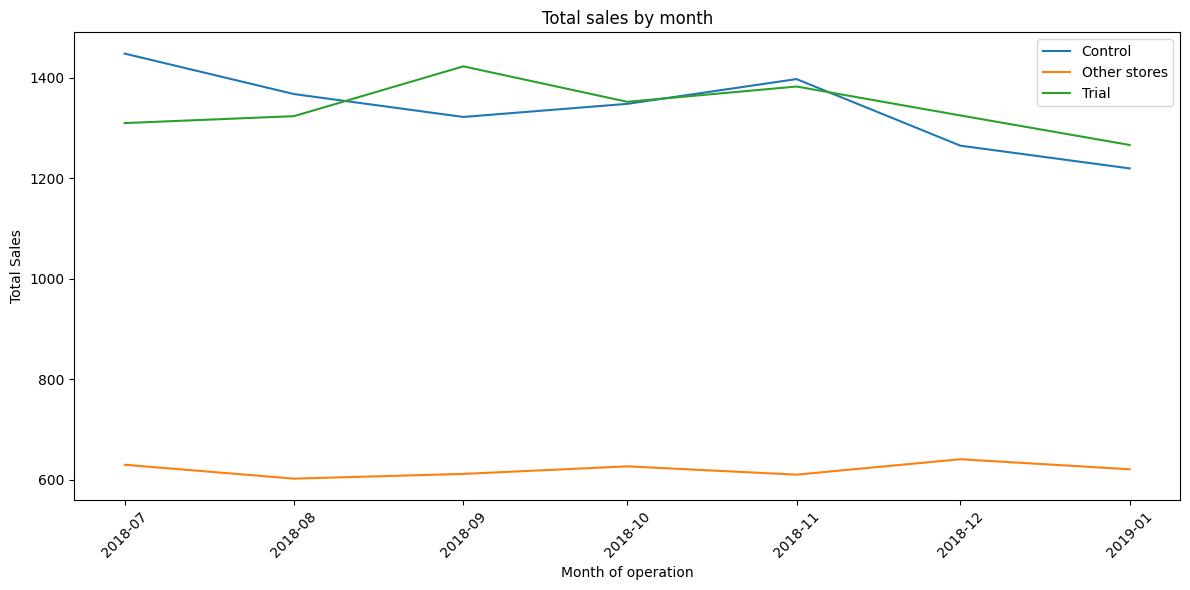

In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a transaction_month column by converting YEARMONTH to datetime
def prepare_sales_data(measure_over_time, trial_store, control_store):
    """
    Prepares data for visualization by grouping and categorizing stores.
    
    Args:
    - measure_over_time: The full DataFrame to process.
    - trial_store: The trial store number.
    - control_store: The control store number.

    Returns:
    - A processed DataFrame suitable for visualization.
    """
    # Classify store types
    measure_over_time['Store_type'] = measure_over_time['STORE_NBR'].apply(
        lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
    )

    # Aggregate average sales by month and store type
    aggregated_sales = measure_over_time.groupby(['YEARMONTH', 'Store_type'])['totsales'].mean().reset_index()

    # Convert YEARMONTH to datetime
    aggregated_sales['TransactionMonth'] = pd.to_datetime(aggregated_sales['YEARMONTH'].astype(str), format='%Y%m')
    
    # Filter data for visualization (months before March 2019)
    past_sales = aggregated_sales[aggregated_sales['TransactionMonth'] < pd.to_datetime("2019-03-01")]
    
    return past_sales



trial_store = 88
control_store = 237  # Replace with computed/actual control store number
measure_over_time = pre_trial_measures  # Input DataFrame should contain 'STORE_NBR', 'YEARMONTH', 'totSales'

# Preprocess the data
past_sales = prepare_sales_data(measure_over_time, trial_store, control_store)

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=past_sales, x='TransactionMonth', y='totsales', hue='Store_type')
plt.xlabel("Month of operation")
plt.ylabel("Total Sales")
plt.title("Total sales by month")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\arvin\AppData\Local\Temp\ipykernel_10084\1924115071.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measure_over_time['Store_type'] = measure_over_time['STORE_NBR'].apply(


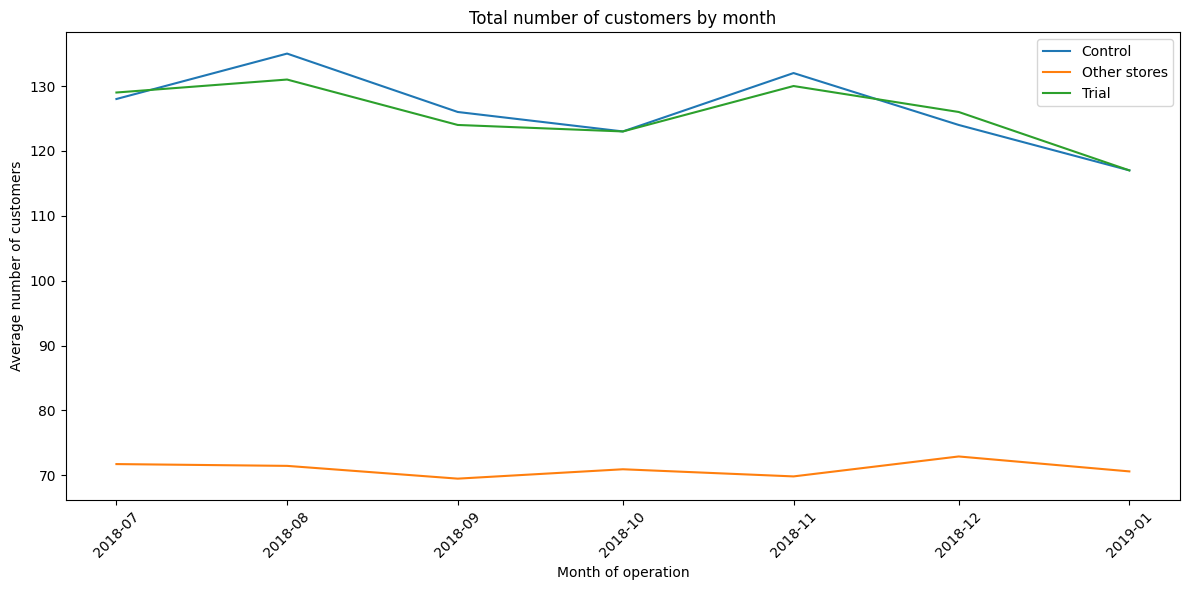

In [406]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Prepare data for visualization
def prepare_customer_data(measure_over_time, trial_store, control_store):
    """
    Prepares data for visualization by grouping and categorizing stores.
    
    Args:
    - measure_over_time: DataFrame with necessary data to process.
    - trial_store: The trial store number.
    - control_store: The control store number.

    Returns:
    - Preprocessed DataFrame for visualization.
    """
    # Classify store types
    measure_over_time['Store_type'] = measure_over_time['STORE_NBR'].apply(
        lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
    )

    # Group by month and compute average number of customers
    aggregated_customers = measure_over_time.groupby(['YEARMONTH', 'Store_type'])['ncustomers'].mean().reset_index()

    # Convert YEARMONTH to datetime
    aggregated_customers['TransactionMonth'] = pd.to_datetime(aggregated_customers['YEARMONTH'].astype(str), format='%Y%m')
    
    # Filter data for visualization months < March 2019
    past_customers = aggregated_customers[aggregated_customers['TransactionMonth'] < pd.to_datetime("2019-03-01")]

    return past_customers


# Example usage with hypothetical data
trial_store = 88
control_store = 237# Replace with the computed or actual control store number
measure_over_time = pre_trial_measures  # Input data with the necessary fields: 'STORE_NBR', 'YEARMONTH', 'nCustomers'

# Preprocess the data
past_customers = prepare_customer_data(measure_over_time, trial_store, control_store)

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=past_customers, x='TransactionMonth', y='ncustomers', hue='Store_type')
plt.xlabel("Month of operation")
plt.ylabel("Average number of customers")
plt.title("Total number of customers by month")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [407]:
# Calculate the scaling factor for control sales
scaling_factor_for_control_sales = (
    pre_trial_measures[
        (pre_trial_measures["STORE_NBR"] == trial_store) & 
        (pre_trial_measures["YEARMONTH"] < 201902)
    ]["totsales"].sum()
    /
    pre_trial_measures[
        (pre_trial_measures["STORE_NBR"] == control_store) & 
        (pre_trial_measures["YEARMONTH"] < 201902)
    ]["totsales"].sum()
)

print("Scaling Factor for Control Sales:", scaling_factor_for_control_sales)


Scaling Factor for Control Sales: 1.001558330664959


In [408]:
# Apply the scaling factor to control store sales
pretrial.loc[
    pretrial["STORE_NBR"] == control_store, "scaledControlSales"
] = (
    pretrial.loc[
        pretrial["STORE_NBR"] == control_store, "totsales"
    ] * scaling_factor_for_control_sales
)

scaled_control_sales = pretrial[pretrial["STORE_NBR"] == control_store] # Display the updated DataFrame
scaled_control_sales

,YEARMONTH,STORE_NBR,totsales,ncustomers,TxnperCus_raw,total_qty,TxnperCus,NchipsCus,avgPPU,scaledControlSales
231,201807,237,1448.4,128,162,324,1.265625,2.531250,4.470370,1450.657086
493,201808,237,1367.8,135,166,313,1.229630,2.318519,4.369968,1369.931485
758,201809,237,1322.2,126,150,299,1.190476,2.373016,4.422074,1324.260425
1023,201810,237,1348.3,123,150,299,1.219512,2.430894,4.509365,1350.401097
1287,201811,237,1397.6,132,161,320,1.219697,2.424242,4.367500,1399.777923
1550,201812,237,1265.0,124,145,289,1.169355,2.330645,4.377163,1266.971288
1813,201901,237,1219.7,117,139,277,1.188034,2.367521,4.403249,1221.600696
2077,201902,237,1404.8,126,157,314,1.246032,2.492063,4.473885,1406.989143
2341,201903,237,1208.2,119,137,274,1.151261,2.302521,4.409489,1210.082775
2607,201904,237,1204.6,120,136,272,1.133333,2.266667,4.428676,1206.477165


In [409]:
# Merge the scaled control sales data with the trial store's sales data on YEARMONTH
percentage_diff = pd.merge(
    scaled_control_sales[["YEARMONTH", "totsales"]],
    pretrial[pretrial["STORE_NBR"] == trial_store][["totsales", "YEARMONTH"]],
    on="YEARMONTH"
)
# Calculate the percentage difference between scaled control sales and trial store sales
percentage_diff["percentageDiff"] = (
    abs(percentage_diff["totsales_y"] - percentage_diff["totsales_x"]) / percentage_diff["totsales_y"]
)

# Display the result
print(percentage_diff)

    YEARMONTH  totsales_x  totsales_y  percentageDiff
0      201807      1448.4     1310.00        0.105649
1      201808      1367.8     1323.80        0.033238
2      201809      1322.2     1423.00        0.070836
3      201810      1348.3     1352.40        0.003032
4      201811      1397.6     1382.80        0.010703
5      201812      1265.0     1325.20        0.045427
6      201901      1219.7     1266.40        0.036876
7      201902      1404.8     1370.20        0.025252
8      201903      1208.2     1477.20        0.182101
9      201904      1204.6     1439.40        0.163124
10     201905      1199.3     1308.25        0.083279
11     201906      1153.6     1354.60        0.148383


In [410]:
# Filter the percentage_diff DataFrame for the pre-trial period (YEARMONTH < 201902)
pre_trial_percentage_diff = percentage_diff[percentage_diff["YEARMONTH"] < 201902]["percentageDiff"]

# Calculate the standard deviation for the pre-trial period
stdDev = pre_trial_percentage_diff.std()

# Display the updated DataFrame
percentage_diff


,YEARMONTH,totsales_x,totsales_y,percentageDiff
0,201807,1448.4,1310.00,0.105649
1,201808,1367.8,1323.80,0.033238
2,201809,1322.2,1423.00,0.070836
3,201810,1348.3,1352.40,0.003032
4,201811,1397.6,1382.80,0.010703
5,201812,1265.0,1325.20,0.045427
6,201901,1219.7,1266.40,0.036876
7,201902,1404.8,1370.20,0.025252
8,201903,1208.2,1477.20,0.182101
9,201904,1204.6,1439.40,0.163124


In [411]:
# Degrees of freedom for the pre-trial period
degreesOfFreedom = 7

# Display the result
print("Degrees of Freedom for the Pre-trial Period:", degreesOfFreedom)


Degrees of Freedom for the Pre-trial Period: 7


In [412]:
# Calculate the t-value based on the null hypothesis (0 difference between trial and control stores)
percentage_diff["tValue"] = (percentage_diff["percentageDiff"] - 0) / stdDev

# Create the 'TransactionMonth' column by converting YEARMONTH to a date (use 1st day of each month)
percentage_diff["TransactionMonth"] = pd.to_datetime(
    percentage_diff["YEARMONTH"].astype(str).str[:4] + '-' + percentage_diff["YEARMONTH"].astype(str).str[4:6] + '-01'
)

# Filter the data for the trial period (YEARMONTH between 201901 and 201905)
filtered_data = percentage_diff[(percentage_diff["YEARMONTH"] > 201901) & (percentage_diff["YEARMONTH"] < 201905)]

# Select the columns 'TransactionMonth' and 'tValue'
result = filtered_data[["TransactionMonth", "tValue"]]

# Display the result
print(result)

  TransactionMonth    tValue
7       2019-02-01  0.715385
8       2019-03-01  5.158944
9       2019-04-01  4.621303


In [413]:
import scipy.stats as stats
t_95th_percentile = stats.t.ppf(0.95, df=degrees_of_freedom)

# Display the result
print(f"The 95th percentile of the t-distribution with {degrees_of_freedom} degrees of freedom is: {t_95th_percentile}")

The 95th percentile of the t-distribution with 7 degrees of freedom is: 1.894578605061305


In [414]:
 measure_over_time_sales = pretrial.copy()
    # Create the 'Store_type' column
measure_over_time_sales['Store_type'] = measure_over_time_sales['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
)

# Calculate the mean 'totSales' by 'YEARMONTH' and 'Store_type'
mean_sales = measure_over_time_sales.groupby(['YEARMONTH', 'Store_type'], as_index=False)['totsales'].mean()

# Create the 'TransactionMonth' column
mean_sales['TransactionMonth'] = pd.to_datetime(mean_sales['YEARMONTH'].astype(str).str[:4] + '-' + mean_sales['YEARMONTH'].astype(str).str[4:6] + '-01')

# Filter for only 'Trial' and 'Control' stores
past_sales = mean_sales[mean_sales['Store_type'].isin(['Trial', 'Control'])]

# Display the result
past_sales

,YEARMONTH,Store_type,totsales,TransactionMonth
0,201807,Control,1448.40,2018-07-01
2,201807,Trial,1310.00,2018-07-01
3,201808,Control,1367.80,2018-08-01
5,201808,Trial,1323.80,2018-08-01
6,201809,Control,1322.20,2018-09-01
8,201809,Trial,1423.00,2018-09-01
9,201810,Control,1348.30,2018-10-01
11,201810,Trial,1352.40,2018-10-01
12,201811,Control,1397.60,2018-11-01
14,201811,Trial,1382.80,2018-11-01


**CONTROL STORE 95TH PERCENTILE**

In [416]:
# Filter the data for control stores
past_sales_control = past_sales[past_sales['Store_type'] == 'Control']

# Adjust the 'totSales' by multiplying with (1 + stdDev * 2)
past_sales_control['totSales'] = past_sales_control['totsales'] * (1 + stdDev * 2)

# Update the 'Store_type' to reflect the 95th percentile confidence interval
past_sales_control['Store_type'] = 'Control95th%confidence interval'

# Display the result
past_sales_control

C:\Users\arvin\AppData\Local\Temp\ipykernel_10084\3428241857.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_sales_control['totSales'] = past_sales_control['totsales'] * (1 + stdDev * 2)
C:\Users\arvin\AppData\Local\Temp\ipykernel_10084\3428241857.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_sales_control['Store_type'] = 'Control95th%confidence interval'


,YEARMONTH,Store_type,totsales,TransactionMonth,totSales
0,201807,Control95th%confidence interval,1448.4,2018-07-01,1550.651738
3,201808,Control95th%confidence interval,1367.8,2018-08-01,1464.361673
6,201809,Control95th%confidence interval,1322.2,2018-09-01,1415.542480
9,201810,Control95th%confidence interval,1348.3,2018-10-01,1443.485045
12,201811,Control95th%confidence interval,1397.6,2018-11-01,1496.265444
15,201812,Control95th%confidence interval,1265.0,2018-12-01,1354.304370
18,201901,Control95th%confidence interval,1219.7,2019-01-01,1305.806355
21,201902,Control95th%confidence interval,1404.8,2019-02-01,1503.973738
24,201903,Control95th%confidence interval,1208.2,2019-03-01,1293.494498
27,201904,Control95th%confidence interval,1204.6,2019-04-01,1289.640351


In [417]:
past_sales_control = past_sales[past_sales['Store_type'] == 'Control']

# Adjust the 'totSales' for the 95th percentile (multiply by (1 + stdDev * 2))
past_sales_control_95th = past_sales_control.copy()
past_sales_control_95th['totsales'] = past_sales_control_95th['totsales'] * (1 + stdDev * 2)
past_sales_control_95th['Store_type'] = 'Control95th%confidence interval'

# Adjust the 'totSales' for the 5th percentile (multiply by (1 - stdDev * 2))
past_sales_control_5th = past_sales_control.copy()
past_sales_control_5th['totsales'] = past_sales_control_5th['totsales'] * (1 - stdDev * 2)
past_sales_control_5th['Store_type'] = 'Control5th%confidence interval'

# Combine all DataFrames (pastSales, pastSales_Controls95, and pastSales_Controls5)
trial_assessment = pd.concat([past_sales, past_sales_control_95th, past_sales_control_5th])

# Display the final result
trial_assessment

,YEARMONTH,Store_type,totsales,TransactionMonth
0,201807,Control,1448.400000,2018-07-01
2,201807,Trial,1310.000000,2018-07-01
3,201808,Control,1367.800000,2018-08-01
5,201808,Trial,1323.800000,2018-08-01
6,201809,Control,1322.200000,2018-09-01
8,201809,Trial,1423.000000,2018-09-01
9,201810,Control,1348.300000,2018-10-01
11,201810,Trial,1352.400000,2018-10-01
12,201811,Control,1397.600000,2018-11-01
14,201811,Trial,1382.800000,2018-11-01


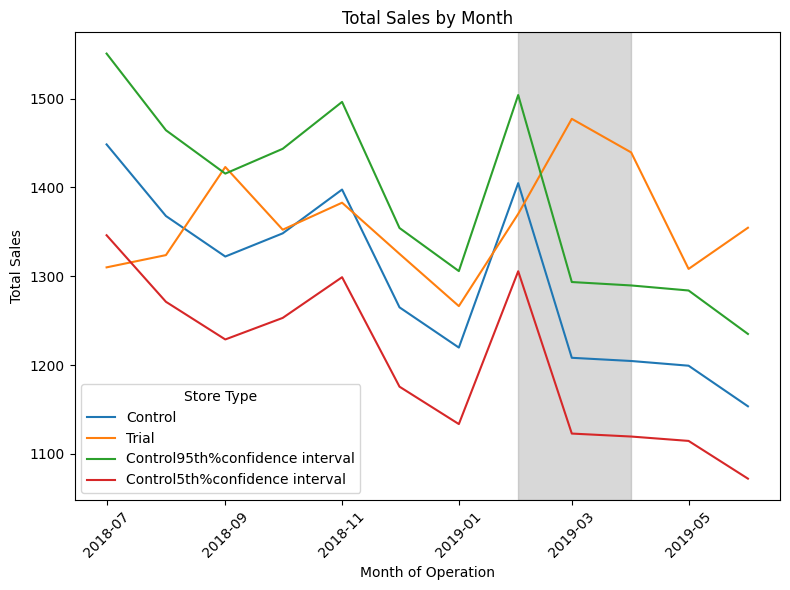

In [420]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'trial_assessment' is your DataFrame containing the necessary data

# Filter the data for the trial period (201901 to 201905)
trial_period_data = trial_assessment[(trial_assessment['YEARMONTH'] > 201901) & (trial_assessment['YEARMONTH'] < 201905)]

# Create the plot
plt.figure(figsize=(8, 6))

# Create the shaded region for the trial period
plt.axvspan(
    min(filtered_data['TransactionMonth']),
    max(filtered_data['TransactionMonth']),
    color='gray', alpha=0.3
)

# Plot the lines for total sales, colored by store type
sns.lineplot(data=trial_assessment, x='TransactionMonth', y='totsales', hue='Store_type')

# Set labels and title
plt.xlabel("Month of Operation")
plt.ylabel("Total Sales")
plt.title("Total Sales by Month")

# Add legend and grid
plt.legend(title="Store Type")


# Display the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()


The results show that the trial in store 88 is significantly different from its control store in the trial period, as the trial store's performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months. Let's have a look at assessing this for the number of customers as well.

In [422]:
scaling_factor_for_control_cust = pre_trial_measures[
    (pre_trial_measures['STORE_NBR'] == trial_store) & (pre_trial_measures['YEARMONTH'] < 201902)
]['ncustomers'].sum() / pre_trial_measures[
    (pre_trial_measures['STORE_NBR'] == control_store) & (pre_trial_measures['YEARMONTH'] < 201902)
]['ncustomers'].sum()


In [423]:
measure_over_time_custs = pretrial.copy()
# Apply the scaling factor to control customers
scaled_control_customers = measure_over_time_custs[measure_over_time_custs['STORE_NBR'] == control_store].copy()

# Scale 'nCustomers' for control stores using the scaling factor
scaled_control_customers['controlCustomers'] = scaled_control_customers['ncustomers'] * scaling_factor_for_control_cust

# Create 'Store_type' column based on STORE_NBR
scaled_control_customers['Store_type'] = scaled_control_customers['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Otherstores')
)


In [424]:
# Merging the data
merged_data = pd.merge(
    scaled_control_customers[['YEARMONTH', 'controlCustomers']],  # Selecting relevant columns from scaled_control_customers
    measure_over_time_custs[measure_over_time_custs['STORE_NBR'] == trial_store][['ncustomers', 'YEARMONTH']],  # Filtering for trial store
    on='YEARMONTH',  # Merge on YEARMONTH
    how='inner'  # Ensure an inner join to only include matching rows
)

# Calculate percentage difference
merged_data['percentageDiff'] = abs(merged_data['controlCustomers'] - merged_data['ncustomers']) / merged_data['controlCustomers']


In [425]:
# Filtering the data for YEARMONTH < 201902
filtered_data = merged_data[merged_data['YEARMONTH'] < 201902]

# Calculate the standard deviation of the 'percentageDiff' column
std_dev = filtered_data['percentageDiff'].std()


In [426]:
measure_over_time_custs['Store_type'] = measure_over_time_custs['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
)

In [427]:
# Group by 'YEARMONTH' and 'Store_type' to calculate the mean of 'nCustomers'
past_customers = measure_over_time_custs.groupby(['YEARMONTH', 'Store_type'], as_index=False)['ncustomers'].mean()

# Filter the data for 'Trial' and 'Control' store types
past_customers = past_customers[past_customers['Store_type'].isin(['Trial', 'Control'])]


**Control Store 95th Percentile**

In [428]:
# Filter for Control store and apply the 95th percentile scaling
past_customers_controls_95 = past_customers[past_customers['Store_type'] == 'Control'].copy()

# Calculate the 95th percentile nCusts using the standard deviation (stdDev)
past_customers_controls_95['ncustomers'] = past_customers_controls_95['ncustomers'] * (1 + stdDev * 2)

# Update the Store_type to indicate this is for the 95th percentile confidence interval
past_customers_controls_95['Store_type'] = 'Control95th%confidence interval'


**Control store 5th Percentile**

In [429]:
# Filter for Control store and apply the 5th percentile scaling
past_customers_controls_5 = past_customers[past_customers['Store_type'] == 'Control'].copy()

# Calculate the 5th percentile nCusts using the standard deviation (stdDev)
past_customers_controls_5['ncustomers'] = past_customers_controls_5['ncustomers'] * (1 - stdDev * 2)

# Update the Store_type to indicate this is for the 5th percentile confidence interval
past_customers_controls_5['Store_type'] = 'Control5th%confidence interval'
# Combine the dataframes by rows (equivalent to rbind in R)
trial_assessment = pd.concat([past_customers, past_customers_controls_95, past_customers_controls_5], ignore_index=True)
trial_assessment

,YEARMONTH,Store_type,ncustomers
0,201807,Control,128.000000
1,201807,Trial,129.000000
2,201808,Control,135.000000
3,201808,Trial,131.000000
4,201809,Control,126.000000
5,201809,Trial,124.000000
6,201810,Control,123.000000
7,201810,Trial,123.000000
8,201811,Control,132.000000
9,201811,Trial,130.000000


In [430]:
# Convert YEARMONTH to datetime with the first day of the month
trial_assessment['TransactionMonth'] = pd.to_datetime(
    trial_assessment['YEARMONTH'].astype(str).apply(lambda x: x[:4] + '-' + x[4:6] + '-01')
)

# Display the first few rows to check the result
print(trial_assessment[['YEARMONTH', 'TransactionMonth']].head())
trial_assessment

   YEARMONTH TransactionMonth
0     201807       2018-07-01
1     201807       2018-07-01
2     201808       2018-08-01
3     201808       2018-08-01
4     201809       2018-09-01


,YEARMONTH,Store_type,ncustomers,TransactionMonth
0,201807,Control,128.000000,2018-07-01
1,201807,Trial,129.000000,2018-07-01
2,201808,Control,135.000000,2018-08-01
3,201808,Trial,131.000000,2018-08-01
4,201809,Control,126.000000,2018-09-01
5,201809,Trial,124.000000,2018-09-01
6,201810,Control,123.000000,2018-10-01
7,201810,Trial,123.000000,2018-10-01
8,201811,Control,132.000000,2018-11-01
9,201811,Trial,130.000000,2018-11-01


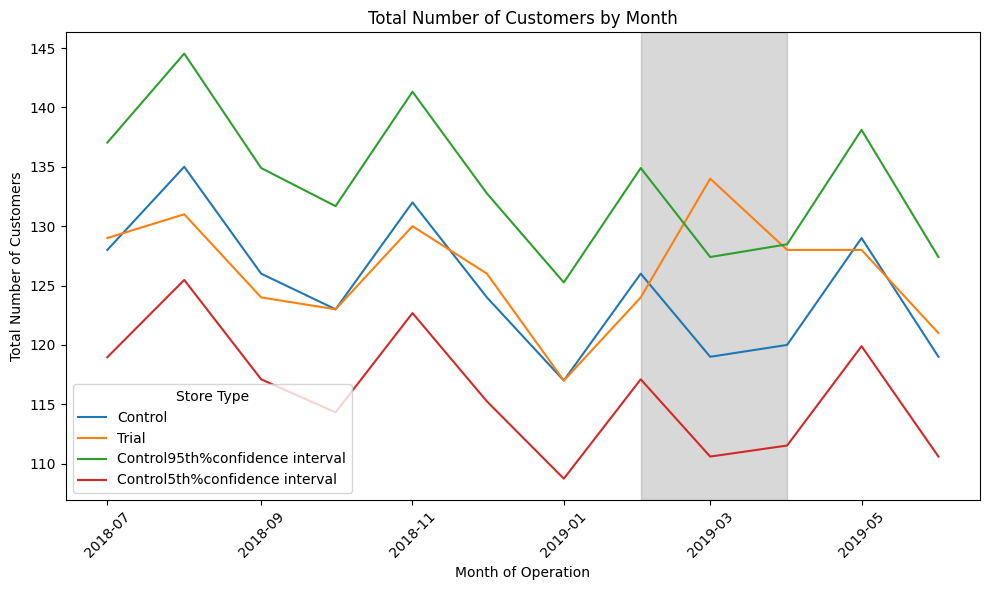

In [431]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter the trial period (YEARMONTH between 201901 and 201905)
trial_period_data = trial_assessment[(trial_assessment['YEARMONTH'] > 201901) & (trial_assessment['YEARMONTH'] < 201905)]

# Create the plot
plt.figure(figsize=(10, 6))

# Create the shaded region for the trial period
plt.axvspan(
    min(trial_period_data['TransactionMonth']),
    max(trial_period_data['TransactionMonth']),
    color='gray', alpha=0.3
)

# Plot the lines for total customers, colored by store type
sns.lineplot(data=trial_assessment, x='TransactionMonth', y='ncustomers', hue='Store_type')

# Set labels and title
plt.xlabel("Month of Operation")
plt.ylabel("Total Number of Customers")
plt.title("Total Number of Customers by Month")
plt.legend(title="Store Type")

# Display the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()


 Total number of customers in the trial period for the trial store is significantly higher than the control store
 for two out of three months, which indicates a positive trial effect.

***We’ve found control stores 233, 155, 237 for trial stores 77, 86 and 88 respectively.
 The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the
 three trial months but this isnot the case for trial store 86***